In [1]:
import praw
import prawcore
import pandas as pd
import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # multiple output per jupyter notebook code block

# 用你的凭证初始化PRAW
reddit = praw.Reddit(client_id='UM6lWvfXGk2OSbUhldBUDg',
                     client_secret='V81N3UC3wCC8h97O-TRQs-MFTXqGag',
                     user_agent='Steve')


## Data Collection (Class, Attribute and Method)

### major datatype

In [2]:
def check(df):
    print(df.shape)
    print(pd.concat([df.isna().mean(), df.dtypes, df.count(), df.nunique()], axis=1).rename({0: 'miss_rate', 1: 'dtype', 2: 'count', 3: 'nunique'}, axis=1))
    return df  

In [3]:
# 获取指定subreddit下的帖子及其评论
def get_submissions_search(subreddit_name, topic, limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    p_count = 0
    c_count = 0
    for post in subreddit.search(topic,limit=limit):
        p_count += 1
        post_info = {
            # fundamental info
            'id': post.id, # ID of the submission.
            'title': post.title, # The title of the submission.
            'author': post.author_flair_text, # The text content of the author's flair, or ``None`` if not flaired.
            # 'created_utc': post.created_utc, # Time the submission was created, represented in `Unix Time`_.
            'time': time.strftime('%Y-%m-%d', time.localtime(post.created_utc)),
            'selftext': post.selftext, # The submissions' selftext - an empty string if a link post.
            # score related
            'distinguished': post.distinguished, # Whether or not the submission is distinguished.
            'score': post.score, # The number of upvotes for the submission.
            'upvote_ratio': post.upvote_ratio, # The percentage of upvotes from all votes on the submission.            
            # next level
            'num_comments': post.num_comments, # The number of comments on the submission.
            'num_top_level_comments': post.comments.__len__(), # number of top-level comments in the forest.            
            'comments': [], # flattened list of all comments.
            # subreddit
            'subreddit_id': post.subreddit.id, # ID of the subreddit.
            'subreddit_name': post.subreddit.name, # Fullname of the subreddit.
            'subreddit_count': post.subreddit.subscribers # Count of subscribers.
        }
        while True:
            try:
                post.comments.replace_more(limit=None,threshold=0)
                break
            except:
                print("Handling replace_more exception")
                time.sleep(60)
        # post.comments.replace_more(limit=None,threshold=)  # Keep direct comments，drop comments of comments
        for comment in post.comments.list():  # Keep the top 20 comments of posts.
            c_count += 1
            print('p:',p_count,'c:',c_count,'avg c per p:',c_count/p_count)
            comment_info = {
                # fundamental info
                'cid': comment.id, # ID of the comment.
                # 'link_id': comment.link_id, # The submission ID that the comment belongs to.
                'clink_id_t': comment.link_id[:2],
                'clink_id_pid': comment.link_id[3:],
                # 'created_utc': comment.created_utc, # Time the comment was created, represented in `Unix Time`_.
                'ctime': time.strftime('%Y-%m-%d', time.localtime(comment.created_utc)),
                'cbody': comment.body, # The body of the comment, as Markdown.
                # score related                
                'cdistinguished': comment.distinguished,
                'cscore': comment.score, # The number of upvotes for the comment.
                # next level
                'cnum_replies': len(comment.replies.list()),
                # subreddit
                'csubreddit_id_t': comment.subreddit_id[:2], # The subreddit ID that the comment belongs to.
                'csubreddit_id_sid': comment.subreddit_id[3:] # The subreddit ID that the comment belongs to.
            }
            post_info['comments'].append(comment_info)
        posts.append(post_info)
    return posts


In [4]:
# 获取指定subreddit下的帖子及其评论
def get_submissions_new(subreddit_name, limit=10):
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    p_count = 0
    c_count = 0
    for post in subreddit.new(limit=limit):
        p_count += 1
        post_info = {
            # fundamental info
            'id': post.id, # ID of the submission.
            'title': post.title, # The title of the submission.
            'author': post.author_flair_text, # The text content of the author's flair, or ``None`` if not flaired.
            # 'created_utc': post.created_utc, # Time the submission was created, represented in `Unix Time`_.
            'time': time.strftime('%Y-%m-%d', time.localtime(post.created_utc)),
            'selftext': post.selftext, # The submissions' selftext - an empty string if a link post.
            # score related
            'distinguished': post.distinguished, # Whether or not the submission is distinguished.
            'score': post.score, # The number of upvotes for the submission.
            'upvote_ratio': post.upvote_ratio, # The percentage of upvotes from all votes on the submission.            
            # next level
            'num_comments': post.num_comments, # The number of comments on the submission.
            'num_top_level_comments': post.comments.__len__(), # number of top-level comments in the forest.            
            'comments': [], # flattened list of all comments.
            # subreddit
            'subreddit_id': post.subreddit.id, # ID of the subreddit.
            'subreddit_name': post.subreddit.name, # Fullname of the subreddit.
            'subreddit_count': post.subreddit.subscribers # Count of subscribers.
        }
        while True:
            try:
                post.comments.replace_more(limit=None,threshold=0)
                break
            except:
                print("Handling replace_more exception")
                time.sleep(60)
        # post.comments.replace_more(limit=None,threshold=)  # Keep direct comments，drop comments of comments
        for comment in post.comments.list():  # Keep the top 20 comments of posts.
            c_count += 1
            print('p:',p_count,'c:',c_count,'avg c per p:',c_count/p_count)
            comment_info = {
                # fundamental info
                'cid': comment.id, # ID of the comment.
                # 'link_id': comment.link_id, # The submission ID that the comment belongs to.
                'clink_id_t': comment.link_id[:2],
                'clink_id_pid': comment.link_id[3:],
                # 'created_utc': comment.created_utc, # Time the comment was created, represented in `Unix Time`_.
                'ctime': time.strftime('%Y-%m-%d', time.localtime(comment.created_utc)),
                'cbody': comment.body, # The body of the comment, as Markdown.
                # score related                
                'cdistinguished': comment.distinguished,
                'cscore': comment.score, # The number of upvotes for the comment.
                # next level
                'cnum_replies': len(comment.replies.list()),
                # subreddit
                'csubreddit_id_t': comment.subreddit_id[:2], # The subreddit ID that the comment belongs to.
                'csubreddit_id_sid': comment.subreddit_id[3:] # The subreddit ID that the comment belongs to.
            }
            post_info['comments'].append(comment_info)
        posts.append(post_info)
    return posts


In [5]:
from collections import defaultdict
def posts2df(posts):
    post_list = []
    comment_list = []
    for post in posts: 
        p_loc = posts.index(post)
        post_comment = defaultdict(list)
        for comment in post['comments']:
            for k, v in comment.items():
                post_comment[k].append(v)
        post_ = defaultdict(list)
        for k, v in post.items():
            if k != 'comments':
                post_[k].append(v)
        post_list.append(pd.DataFrame(post_,index=[p_loc]))
        comment_list.append(pd.DataFrame(post_comment))

    df_submissions = pd.merge(pd.concat(post_list),pd.concat(comment_list),left_on='id',right_on='clink_id_pid',how='left')            
    # df_submissions['join_time'] = df_submissions['time'] + df_submissions['ctime']
    df_submissions['time'] = pd.to_datetime(df_submissions['time'])
    df_submissions['ctime'] = pd.to_datetime(df_submissions['ctime'])

    df_submissions = df_submissions[~(df_submissions['cdistinguished'] == 'moderator')]
    return df_submissions

In [6]:
subreddit_name = 'wallstreetbets'
topic = 'AMD'
posts_bets_ai = get_submissions_search(subreddit_name,topic,limit = None)

p: 1 c: 1 avg c per p: 1.0
p: 1 c: 2 avg c per p: 2.0
p: 1 c: 3 avg c per p: 3.0
p: 1 c: 4 avg c per p: 4.0
p: 1 c: 5 avg c per p: 5.0
p: 1 c: 6 avg c per p: 6.0
p: 1 c: 7 avg c per p: 7.0
p: 1 c: 8 avg c per p: 8.0
p: 1 c: 9 avg c per p: 9.0
p: 1 c: 10 avg c per p: 10.0
p: 1 c: 11 avg c per p: 11.0
p: 1 c: 12 avg c per p: 12.0
p: 1 c: 13 avg c per p: 13.0
p: 1 c: 14 avg c per p: 14.0
p: 1 c: 15 avg c per p: 15.0
p: 1 c: 16 avg c per p: 16.0
p: 1 c: 17 avg c per p: 17.0
p: 1 c: 18 avg c per p: 18.0
p: 1 c: 19 avg c per p: 19.0
p: 1 c: 20 avg c per p: 20.0
p: 1 c: 21 avg c per p: 21.0
p: 1 c: 22 avg c per p: 22.0
p: 1 c: 23 avg c per p: 23.0
p: 1 c: 24 avg c per p: 24.0
p: 1 c: 25 avg c per p: 25.0
p: 1 c: 26 avg c per p: 26.0
p: 1 c: 27 avg c per p: 27.0
p: 1 c: 28 avg c per p: 28.0
p: 1 c: 29 avg c per p: 29.0
p: 1 c: 30 avg c per p: 30.0
p: 1 c: 31 avg c per p: 31.0
p: 1 c: 32 avg c per p: 32.0
p: 1 c: 33 avg c per p: 33.0
p: 1 c: 34 avg c per p: 34.0
p: 1 c: 35 avg c per p: 35.0
p: 

p: 3 c: 283 avg c per p: 94.33333333333333
p: 3 c: 284 avg c per p: 94.66666666666667
p: 3 c: 285 avg c per p: 95.0
p: 3 c: 286 avg c per p: 95.33333333333333
p: 3 c: 287 avg c per p: 95.66666666666667
p: 3 c: 288 avg c per p: 96.0
p: 3 c: 289 avg c per p: 96.33333333333333
p: 3 c: 290 avg c per p: 96.66666666666667
p: 3 c: 291 avg c per p: 97.0
p: 3 c: 292 avg c per p: 97.33333333333333
p: 3 c: 293 avg c per p: 97.66666666666667
p: 3 c: 294 avg c per p: 98.0
p: 3 c: 295 avg c per p: 98.33333333333333
p: 3 c: 296 avg c per p: 98.66666666666667
p: 3 c: 297 avg c per p: 99.0
p: 3 c: 298 avg c per p: 99.33333333333333
p: 3 c: 299 avg c per p: 99.66666666666667
p: 3 c: 300 avg c per p: 100.0
p: 3 c: 301 avg c per p: 100.33333333333333
p: 3 c: 302 avg c per p: 100.66666666666667
p: 3 c: 303 avg c per p: 101.0
p: 3 c: 304 avg c per p: 101.33333333333333
p: 3 c: 305 avg c per p: 101.66666666666667
p: 3 c: 306 avg c per p: 102.0
p: 3 c: 307 avg c per p: 102.33333333333333
p: 3 c: 308 avg c per

p: 5 c: 730 avg c per p: 146.0
p: 5 c: 731 avg c per p: 146.2
p: 5 c: 732 avg c per p: 146.4
p: 5 c: 733 avg c per p: 146.6
p: 5 c: 734 avg c per p: 146.8
p: 5 c: 735 avg c per p: 147.0
p: 5 c: 736 avg c per p: 147.2
p: 5 c: 737 avg c per p: 147.4
p: 5 c: 738 avg c per p: 147.6
p: 5 c: 739 avg c per p: 147.8
p: 5 c: 740 avg c per p: 148.0
p: 5 c: 741 avg c per p: 148.2
p: 5 c: 742 avg c per p: 148.4
p: 5 c: 743 avg c per p: 148.6
p: 5 c: 744 avg c per p: 148.8
p: 5 c: 745 avg c per p: 149.0
p: 5 c: 746 avg c per p: 149.2
p: 5 c: 747 avg c per p: 149.4
p: 5 c: 748 avg c per p: 149.6
p: 5 c: 749 avg c per p: 149.8
p: 5 c: 750 avg c per p: 150.0
p: 5 c: 751 avg c per p: 150.2
p: 5 c: 752 avg c per p: 150.4
p: 5 c: 753 avg c per p: 150.6
p: 5 c: 754 avg c per p: 150.8
p: 5 c: 755 avg c per p: 151.0
p: 5 c: 756 avg c per p: 151.2
p: 5 c: 757 avg c per p: 151.4
p: 5 c: 758 avg c per p: 151.6
p: 5 c: 759 avg c per p: 151.8
p: 5 c: 760 avg c per p: 152.0
p: 5 c: 761 avg c per p: 152.2
p: 5 c: 

p: 7 c: 1095 avg c per p: 156.42857142857142
p: 7 c: 1096 avg c per p: 156.57142857142858
p: 7 c: 1097 avg c per p: 156.71428571428572
p: 7 c: 1098 avg c per p: 156.85714285714286
p: 7 c: 1099 avg c per p: 157.0
p: 7 c: 1100 avg c per p: 157.14285714285714
p: 7 c: 1101 avg c per p: 157.28571428571428
p: 7 c: 1102 avg c per p: 157.42857142857142
p: 7 c: 1103 avg c per p: 157.57142857142858
p: 7 c: 1104 avg c per p: 157.71428571428572
p: 7 c: 1105 avg c per p: 157.85714285714286
p: 7 c: 1106 avg c per p: 158.0
p: 7 c: 1107 avg c per p: 158.14285714285714
p: 7 c: 1108 avg c per p: 158.28571428571428
p: 7 c: 1109 avg c per p: 158.42857142857142
p: 7 c: 1110 avg c per p: 158.57142857142858
p: 7 c: 1111 avg c per p: 158.71428571428572
p: 7 c: 1112 avg c per p: 158.85714285714286
p: 7 c: 1113 avg c per p: 159.0
p: 7 c: 1114 avg c per p: 159.14285714285714
p: 7 c: 1115 avg c per p: 159.28571428571428
p: 7 c: 1116 avg c per p: 159.42857142857142
p: 7 c: 1117 avg c per p: 159.57142857142858
p: 7

p: 8 c: 1908 avg c per p: 238.5
p: 8 c: 1909 avg c per p: 238.625
p: 8 c: 1910 avg c per p: 238.75
p: 8 c: 1911 avg c per p: 238.875
p: 8 c: 1912 avg c per p: 239.0
p: 8 c: 1913 avg c per p: 239.125
p: 8 c: 1914 avg c per p: 239.25
p: 8 c: 1915 avg c per p: 239.375
p: 8 c: 1916 avg c per p: 239.5
p: 8 c: 1917 avg c per p: 239.625
p: 8 c: 1918 avg c per p: 239.75
p: 8 c: 1919 avg c per p: 239.875
p: 8 c: 1920 avg c per p: 240.0
p: 8 c: 1921 avg c per p: 240.125
p: 8 c: 1922 avg c per p: 240.25
p: 8 c: 1923 avg c per p: 240.375
p: 8 c: 1924 avg c per p: 240.5
p: 8 c: 1925 avg c per p: 240.625
p: 8 c: 1926 avg c per p: 240.75
p: 8 c: 1927 avg c per p: 240.875
p: 8 c: 1928 avg c per p: 241.0
p: 8 c: 1929 avg c per p: 241.125
p: 8 c: 1930 avg c per p: 241.25
p: 8 c: 1931 avg c per p: 241.375
p: 8 c: 1932 avg c per p: 241.5
p: 8 c: 1933 avg c per p: 241.625
p: 8 c: 1934 avg c per p: 241.75
p: 8 c: 1935 avg c per p: 241.875
p: 8 c: 1936 avg c per p: 242.0
p: 8 c: 1937 avg c per p: 242.125
p: 

p: 10 c: 2462 avg c per p: 246.2
p: 10 c: 2463 avg c per p: 246.3
p: 10 c: 2464 avg c per p: 246.4
p: 10 c: 2465 avg c per p: 246.5
p: 10 c: 2466 avg c per p: 246.6
p: 10 c: 2467 avg c per p: 246.7
p: 10 c: 2468 avg c per p: 246.8
p: 10 c: 2469 avg c per p: 246.9
p: 10 c: 2470 avg c per p: 247.0
p: 10 c: 2471 avg c per p: 247.1
p: 10 c: 2472 avg c per p: 247.2
p: 10 c: 2473 avg c per p: 247.3
p: 10 c: 2474 avg c per p: 247.4
p: 10 c: 2475 avg c per p: 247.5
p: 10 c: 2476 avg c per p: 247.6
p: 10 c: 2477 avg c per p: 247.7
p: 10 c: 2478 avg c per p: 247.8
p: 10 c: 2479 avg c per p: 247.9
p: 10 c: 2480 avg c per p: 248.0
p: 10 c: 2481 avg c per p: 248.1
p: 10 c: 2482 avg c per p: 248.2
p: 10 c: 2483 avg c per p: 248.3
p: 10 c: 2484 avg c per p: 248.4
p: 10 c: 2485 avg c per p: 248.5
p: 10 c: 2486 avg c per p: 248.6
p: 10 c: 2487 avg c per p: 248.7
p: 10 c: 2488 avg c per p: 248.8
p: 10 c: 2489 avg c per p: 248.9
p: 10 c: 2490 avg c per p: 249.0
p: 10 c: 2491 avg c per p: 249.1
p: 10 c: 2

p: 10 c: 3120 avg c per p: 312.0
p: 10 c: 3121 avg c per p: 312.1
p: 10 c: 3122 avg c per p: 312.2
p: 10 c: 3123 avg c per p: 312.3
p: 10 c: 3124 avg c per p: 312.4
p: 10 c: 3125 avg c per p: 312.5
p: 10 c: 3126 avg c per p: 312.6
p: 10 c: 3127 avg c per p: 312.7
p: 10 c: 3128 avg c per p: 312.8
p: 10 c: 3129 avg c per p: 312.9
p: 10 c: 3130 avg c per p: 313.0
p: 10 c: 3131 avg c per p: 313.1
p: 10 c: 3132 avg c per p: 313.2
p: 10 c: 3133 avg c per p: 313.3
p: 10 c: 3134 avg c per p: 313.4
p: 10 c: 3135 avg c per p: 313.5
p: 10 c: 3136 avg c per p: 313.6
p: 10 c: 3137 avg c per p: 313.7
p: 10 c: 3138 avg c per p: 313.8
p: 10 c: 3139 avg c per p: 313.9
p: 10 c: 3140 avg c per p: 314.0
p: 10 c: 3141 avg c per p: 314.1
p: 10 c: 3142 avg c per p: 314.2
p: 10 c: 3143 avg c per p: 314.3
p: 10 c: 3144 avg c per p: 314.4
p: 10 c: 3145 avg c per p: 314.5
p: 10 c: 3146 avg c per p: 314.6
p: 10 c: 3147 avg c per p: 314.7
p: 10 c: 3148 avg c per p: 314.8
p: 10 c: 3149 avg c per p: 314.9
p: 10 c: 3

p: 11 c: 3413 avg c per p: 310.27272727272725
p: 11 c: 3414 avg c per p: 310.3636363636364
p: 11 c: 3415 avg c per p: 310.45454545454544
p: 11 c: 3416 avg c per p: 310.54545454545456
p: 11 c: 3417 avg c per p: 310.6363636363636
p: 11 c: 3418 avg c per p: 310.72727272727275
p: 11 c: 3419 avg c per p: 310.8181818181818
p: 11 c: 3420 avg c per p: 310.90909090909093
p: 11 c: 3421 avg c per p: 311.0
p: 11 c: 3422 avg c per p: 311.09090909090907
p: 11 c: 3423 avg c per p: 311.1818181818182
p: 11 c: 3424 avg c per p: 311.27272727272725
p: 11 c: 3425 avg c per p: 311.3636363636364
p: 11 c: 3426 avg c per p: 311.45454545454544
p: 11 c: 3427 avg c per p: 311.54545454545456
p: 11 c: 3428 avg c per p: 311.6363636363636
p: 11 c: 3429 avg c per p: 311.72727272727275
p: 11 c: 3430 avg c per p: 311.8181818181818
p: 11 c: 3431 avg c per p: 311.90909090909093
p: 11 c: 3432 avg c per p: 312.0
p: 11 c: 3433 avg c per p: 312.09090909090907
p: 11 c: 3434 avg c per p: 312.1818181818182
p: 11 c: 3435 avg c pe

p: 12 c: 3879 avg c per p: 323.25
p: 12 c: 3880 avg c per p: 323.3333333333333
p: 12 c: 3881 avg c per p: 323.4166666666667
p: 12 c: 3882 avg c per p: 323.5
p: 12 c: 3883 avg c per p: 323.5833333333333
p: 12 c: 3884 avg c per p: 323.6666666666667
p: 12 c: 3885 avg c per p: 323.75
p: 12 c: 3886 avg c per p: 323.8333333333333
p: 12 c: 3887 avg c per p: 323.9166666666667
p: 12 c: 3888 avg c per p: 324.0
p: 12 c: 3889 avg c per p: 324.0833333333333
p: 12 c: 3890 avg c per p: 324.1666666666667
p: 12 c: 3891 avg c per p: 324.25
p: 12 c: 3892 avg c per p: 324.3333333333333
p: 12 c: 3893 avg c per p: 324.4166666666667
p: 12 c: 3894 avg c per p: 324.5
p: 12 c: 3895 avg c per p: 324.5833333333333
p: 12 c: 3896 avg c per p: 324.6666666666667
p: 12 c: 3897 avg c per p: 324.75
p: 12 c: 3898 avg c per p: 324.8333333333333
p: 12 c: 3899 avg c per p: 324.9166666666667
p: 12 c: 3900 avg c per p: 325.0
p: 12 c: 3901 avg c per p: 325.0833333333333
p: 12 c: 3902 avg c per p: 325.1666666666667
p: 12 c: 390

p: 13 c: 4122 avg c per p: 317.0769230769231
p: 13 c: 4123 avg c per p: 317.15384615384613
p: 13 c: 4124 avg c per p: 317.2307692307692
p: 13 c: 4125 avg c per p: 317.3076923076923
p: 13 c: 4126 avg c per p: 317.38461538461536
p: 13 c: 4127 avg c per p: 317.46153846153845
p: 13 c: 4128 avg c per p: 317.53846153846155
p: 13 c: 4129 avg c per p: 317.61538461538464
p: 13 c: 4130 avg c per p: 317.6923076923077
p: 13 c: 4131 avg c per p: 317.7692307692308
p: 13 c: 4132 avg c per p: 317.84615384615387
p: 13 c: 4133 avg c per p: 317.9230769230769
p: 13 c: 4134 avg c per p: 318.0
p: 13 c: 4135 avg c per p: 318.0769230769231
p: 13 c: 4136 avg c per p: 318.15384615384613
p: 13 c: 4137 avg c per p: 318.2307692307692
p: 13 c: 4138 avg c per p: 318.3076923076923
p: 13 c: 4139 avg c per p: 318.38461538461536
p: 13 c: 4140 avg c per p: 318.46153846153845
p: 13 c: 4141 avg c per p: 318.53846153846155
p: 13 c: 4142 avg c per p: 318.61538461538464
p: 13 c: 4143 avg c per p: 318.6923076923077
p: 13 c: 41

p: 14 c: 4644 avg c per p: 331.7142857142857
p: 14 c: 4645 avg c per p: 331.7857142857143
p: 14 c: 4646 avg c per p: 331.85714285714283
p: 14 c: 4647 avg c per p: 331.92857142857144
p: 14 c: 4648 avg c per p: 332.0
p: 14 c: 4649 avg c per p: 332.07142857142856
p: 14 c: 4650 avg c per p: 332.14285714285717
p: 14 c: 4651 avg c per p: 332.2142857142857
p: 14 c: 4652 avg c per p: 332.2857142857143
p: 14 c: 4653 avg c per p: 332.35714285714283
p: 14 c: 4654 avg c per p: 332.42857142857144
p: 14 c: 4655 avg c per p: 332.5
p: 14 c: 4656 avg c per p: 332.57142857142856
p: 14 c: 4657 avg c per p: 332.64285714285717
p: 14 c: 4658 avg c per p: 332.7142857142857
p: 14 c: 4659 avg c per p: 332.7857142857143
p: 14 c: 4660 avg c per p: 332.85714285714283
p: 14 c: 4661 avg c per p: 332.92857142857144
p: 14 c: 4662 avg c per p: 333.0
p: 14 c: 4663 avg c per p: 333.07142857142856
p: 14 c: 4664 avg c per p: 333.14285714285717
p: 14 c: 4665 avg c per p: 333.2142857142857
p: 14 c: 4666 avg c per p: 333.285

p: 14 c: 5345 avg c per p: 381.7857142857143
p: 14 c: 5346 avg c per p: 381.85714285714283
p: 14 c: 5347 avg c per p: 381.92857142857144
p: 14 c: 5348 avg c per p: 382.0
p: 14 c: 5349 avg c per p: 382.07142857142856
p: 14 c: 5350 avg c per p: 382.14285714285717
p: 14 c: 5351 avg c per p: 382.2142857142857
p: 14 c: 5352 avg c per p: 382.2857142857143
p: 14 c: 5353 avg c per p: 382.35714285714283
p: 14 c: 5354 avg c per p: 382.42857142857144
p: 14 c: 5355 avg c per p: 382.5
p: 14 c: 5356 avg c per p: 382.57142857142856
p: 14 c: 5357 avg c per p: 382.64285714285717
p: 14 c: 5358 avg c per p: 382.7142857142857
p: 14 c: 5359 avg c per p: 382.7857142857143
p: 14 c: 5360 avg c per p: 382.85714285714283
p: 14 c: 5361 avg c per p: 382.92857142857144
p: 14 c: 5362 avg c per p: 383.0
p: 14 c: 5363 avg c per p: 383.07142857142856
p: 14 c: 5364 avg c per p: 383.14285714285717
p: 14 c: 5365 avg c per p: 383.2142857142857
p: 14 c: 5366 avg c per p: 383.2857142857143
p: 14 c: 5367 avg c per p: 383.357

p: 15 c: 5560 avg c per p: 370.6666666666667
p: 15 c: 5561 avg c per p: 370.73333333333335
p: 15 c: 5562 avg c per p: 370.8
p: 15 c: 5563 avg c per p: 370.8666666666667
p: 15 c: 5564 avg c per p: 370.93333333333334
p: 15 c: 5565 avg c per p: 371.0
p: 15 c: 5566 avg c per p: 371.06666666666666
p: 15 c: 5567 avg c per p: 371.1333333333333
p: 15 c: 5568 avg c per p: 371.2
p: 15 c: 5569 avg c per p: 371.26666666666665
p: 15 c: 5570 avg c per p: 371.3333333333333
p: 15 c: 5571 avg c per p: 371.4
p: 15 c: 5572 avg c per p: 371.46666666666664
p: 15 c: 5573 avg c per p: 371.53333333333336
p: 15 c: 5574 avg c per p: 371.6
p: 15 c: 5575 avg c per p: 371.6666666666667
p: 15 c: 5576 avg c per p: 371.73333333333335
p: 15 c: 5577 avg c per p: 371.8
p: 15 c: 5578 avg c per p: 371.8666666666667
p: 15 c: 5579 avg c per p: 371.93333333333334
p: 15 c: 5580 avg c per p: 372.0
p: 15 c: 5581 avg c per p: 372.06666666666666
p: 15 c: 5582 avg c per p: 372.1333333333333
p: 15 c: 5583 avg c per p: 372.2
p: 15 c

p: 17 c: 6027 avg c per p: 354.52941176470586
p: 17 c: 6028 avg c per p: 354.5882352941176
p: 17 c: 6029 avg c per p: 354.6470588235294
p: 17 c: 6030 avg c per p: 354.70588235294116
p: 17 c: 6031 avg c per p: 354.7647058823529
p: 17 c: 6032 avg c per p: 354.8235294117647
p: 17 c: 6033 avg c per p: 354.88235294117646
p: 17 c: 6034 avg c per p: 354.94117647058823
p: 17 c: 6035 avg c per p: 355.0
p: 17 c: 6036 avg c per p: 355.05882352941177
p: 17 c: 6037 avg c per p: 355.11764705882354
p: 17 c: 6038 avg c per p: 355.1764705882353
p: 17 c: 6039 avg c per p: 355.2352941176471
p: 17 c: 6040 avg c per p: 355.29411764705884
p: 17 c: 6041 avg c per p: 355.3529411764706
p: 17 c: 6042 avg c per p: 355.4117647058824
p: 17 c: 6043 avg c per p: 355.47058823529414
p: 17 c: 6044 avg c per p: 355.52941176470586
p: 17 c: 6045 avg c per p: 355.5882352941176
p: 17 c: 6046 avg c per p: 355.6470588235294
p: 17 c: 6047 avg c per p: 355.70588235294116
p: 17 c: 6048 avg c per p: 355.7647058823529
p: 17 c: 604

p: 18 c: 6598 avg c per p: 366.55555555555554
p: 18 c: 6599 avg c per p: 366.6111111111111
p: 18 c: 6600 avg c per p: 366.6666666666667
p: 18 c: 6601 avg c per p: 366.72222222222223
p: 18 c: 6602 avg c per p: 366.77777777777777
p: 18 c: 6603 avg c per p: 366.8333333333333
p: 18 c: 6604 avg c per p: 366.8888888888889
p: 18 c: 6605 avg c per p: 366.94444444444446
p: 18 c: 6606 avg c per p: 367.0
p: 18 c: 6607 avg c per p: 367.05555555555554
p: 18 c: 6608 avg c per p: 367.1111111111111
p: 18 c: 6609 avg c per p: 367.1666666666667
p: 18 c: 6610 avg c per p: 367.22222222222223
p: 18 c: 6611 avg c per p: 367.27777777777777
p: 18 c: 6612 avg c per p: 367.3333333333333
p: 18 c: 6613 avg c per p: 367.3888888888889
p: 18 c: 6614 avg c per p: 367.44444444444446
p: 18 c: 6615 avg c per p: 367.5
p: 18 c: 6616 avg c per p: 367.55555555555554
p: 18 c: 6617 avg c per p: 367.6111111111111
p: 18 c: 6618 avg c per p: 367.6666666666667
p: 18 c: 6619 avg c per p: 367.72222222222223
p: 18 c: 6620 avg c per 

p: 20 c: 7069 avg c per p: 353.45
p: 20 c: 7070 avg c per p: 353.5
p: 20 c: 7071 avg c per p: 353.55
p: 20 c: 7072 avg c per p: 353.6
p: 20 c: 7073 avg c per p: 353.65
p: 20 c: 7074 avg c per p: 353.7
p: 20 c: 7075 avg c per p: 353.75
p: 20 c: 7076 avg c per p: 353.8
p: 20 c: 7077 avg c per p: 353.85
p: 20 c: 7078 avg c per p: 353.9
p: 20 c: 7079 avg c per p: 353.95
p: 20 c: 7080 avg c per p: 354.0
p: 20 c: 7081 avg c per p: 354.05
p: 20 c: 7082 avg c per p: 354.1
p: 20 c: 7083 avg c per p: 354.15
p: 20 c: 7084 avg c per p: 354.2
p: 20 c: 7085 avg c per p: 354.25
p: 20 c: 7086 avg c per p: 354.3
p: 20 c: 7087 avg c per p: 354.35
p: 20 c: 7088 avg c per p: 354.4
p: 20 c: 7089 avg c per p: 354.45
p: 20 c: 7090 avg c per p: 354.5
p: 20 c: 7091 avg c per p: 354.55
p: 20 c: 7092 avg c per p: 354.6
p: 20 c: 7093 avg c per p: 354.65
p: 20 c: 7094 avg c per p: 354.7
p: 20 c: 7095 avg c per p: 354.75
p: 20 c: 7096 avg c per p: 354.8
p: 20 c: 7097 avg c per p: 354.85
p: 20 c: 7098 avg c per p: 3

p: 20 c: 7738 avg c per p: 386.9
p: 20 c: 7739 avg c per p: 386.95
p: 20 c: 7740 avg c per p: 387.0
p: 20 c: 7741 avg c per p: 387.05
p: 20 c: 7742 avg c per p: 387.1
p: 20 c: 7743 avg c per p: 387.15
p: 20 c: 7744 avg c per p: 387.2
p: 20 c: 7745 avg c per p: 387.25
p: 20 c: 7746 avg c per p: 387.3
p: 20 c: 7747 avg c per p: 387.35
p: 20 c: 7748 avg c per p: 387.4
p: 20 c: 7749 avg c per p: 387.45
p: 20 c: 7750 avg c per p: 387.5
p: 20 c: 7751 avg c per p: 387.55
p: 20 c: 7752 avg c per p: 387.6
p: 20 c: 7753 avg c per p: 387.65
p: 20 c: 7754 avg c per p: 387.7
p: 20 c: 7755 avg c per p: 387.75
p: 20 c: 7756 avg c per p: 387.8
p: 20 c: 7757 avg c per p: 387.85
p: 20 c: 7758 avg c per p: 387.9
p: 20 c: 7759 avg c per p: 387.95
p: 20 c: 7760 avg c per p: 388.0
p: 20 c: 7761 avg c per p: 388.05
p: 20 c: 7762 avg c per p: 388.1
p: 20 c: 7763 avg c per p: 388.15
p: 20 c: 7764 avg c per p: 388.2
p: 20 c: 7765 avg c per p: 388.25
p: 20 c: 7766 avg c per p: 388.3
p: 20 c: 7767 avg c per p: 38

p: 22 c: 7980 avg c per p: 362.72727272727275
p: 22 c: 7981 avg c per p: 362.77272727272725
p: 22 c: 7982 avg c per p: 362.8181818181818
p: 22 c: 7983 avg c per p: 362.8636363636364
p: 22 c: 7984 avg c per p: 362.90909090909093
p: 22 c: 7985 avg c per p: 362.95454545454544
p: 22 c: 7986 avg c per p: 363.0
p: 22 c: 7987 avg c per p: 363.04545454545456
p: 22 c: 7988 avg c per p: 363.09090909090907
p: 22 c: 7989 avg c per p: 363.1363636363636
p: 22 c: 7990 avg c per p: 363.1818181818182
p: 22 c: 7991 avg c per p: 363.22727272727275
p: 22 c: 7992 avg c per p: 363.27272727272725
p: 22 c: 7993 avg c per p: 363.3181818181818
p: 22 c: 7994 avg c per p: 363.3636363636364
p: 22 c: 7995 avg c per p: 363.40909090909093
p: 22 c: 7996 avg c per p: 363.45454545454544
p: 22 c: 7997 avg c per p: 363.5
p: 22 c: 7998 avg c per p: 363.54545454545456
p: 22 c: 7999 avg c per p: 363.59090909090907
p: 22 c: 8000 avg c per p: 363.6363636363636
p: 22 c: 8001 avg c per p: 363.6818181818182
p: 22 c: 8002 avg c pe

p: 23 c: 8169 avg c per p: 355.17391304347825
p: 23 c: 8170 avg c per p: 355.2173913043478
p: 23 c: 8171 avg c per p: 355.2608695652174
p: 23 c: 8172 avg c per p: 355.30434782608694
p: 23 c: 8173 avg c per p: 355.3478260869565
p: 23 c: 8174 avg c per p: 355.39130434782606
p: 23 c: 8175 avg c per p: 355.4347826086956
p: 23 c: 8176 avg c per p: 355.4782608695652
p: 23 c: 8177 avg c per p: 355.5217391304348
p: 23 c: 8178 avg c per p: 355.5652173913044
p: 23 c: 8179 avg c per p: 355.60869565217394
p: 23 c: 8180 avg c per p: 355.6521739130435
p: 23 c: 8181 avg c per p: 355.69565217391306
p: 23 c: 8182 avg c per p: 355.7391304347826
p: 23 c: 8183 avg c per p: 355.7826086956522
p: 23 c: 8184 avg c per p: 355.82608695652175
p: 23 c: 8185 avg c per p: 355.8695652173913
p: 23 c: 8186 avg c per p: 355.9130434782609
p: 23 c: 8187 avg c per p: 355.95652173913044
p: 23 c: 8188 avg c per p: 356.0
p: 23 c: 8189 avg c per p: 356.04347826086956
p: 23 c: 8190 avg c per p: 356.0869565217391
p: 23 c: 8191 

p: 24 c: 8868 avg c per p: 369.5
p: 24 c: 8869 avg c per p: 369.5416666666667
p: 24 c: 8870 avg c per p: 369.5833333333333
p: 24 c: 8871 avg c per p: 369.625
p: 24 c: 8872 avg c per p: 369.6666666666667
p: 24 c: 8873 avg c per p: 369.7083333333333
p: 24 c: 8874 avg c per p: 369.75
p: 24 c: 8875 avg c per p: 369.7916666666667
p: 24 c: 8876 avg c per p: 369.8333333333333
p: 24 c: 8877 avg c per p: 369.875
p: 24 c: 8878 avg c per p: 369.9166666666667
p: 24 c: 8879 avg c per p: 369.9583333333333
p: 24 c: 8880 avg c per p: 370.0
p: 24 c: 8881 avg c per p: 370.0416666666667
p: 24 c: 8882 avg c per p: 370.0833333333333
p: 24 c: 8883 avg c per p: 370.125
p: 24 c: 8884 avg c per p: 370.1666666666667
p: 24 c: 8885 avg c per p: 370.2083333333333
p: 24 c: 8886 avg c per p: 370.25
p: 24 c: 8887 avg c per p: 370.2916666666667
p: 24 c: 8888 avg c per p: 370.3333333333333
p: 24 c: 8889 avg c per p: 370.375
p: 24 c: 8890 avg c per p: 370.4166666666667
p: 24 c: 8891 avg c per p: 370.4583333333333
p: 24 

p: 26 c: 9521 avg c per p: 366.1923076923077
p: 26 c: 9522 avg c per p: 366.2307692307692
p: 26 c: 9523 avg c per p: 366.2692307692308
p: 26 c: 9524 avg c per p: 366.3076923076923
p: 26 c: 9525 avg c per p: 366.34615384615387
p: 26 c: 9526 avg c per p: 366.38461538461536
p: 26 c: 9527 avg c per p: 366.4230769230769
p: 26 c: 9528 avg c per p: 366.46153846153845
p: 26 c: 9529 avg c per p: 366.5
p: 26 c: 9530 avg c per p: 366.53846153846155
p: 26 c: 9531 avg c per p: 366.5769230769231
p: 26 c: 9532 avg c per p: 366.61538461538464
p: 26 c: 9533 avg c per p: 366.65384615384613
p: 26 c: 9534 avg c per p: 366.6923076923077
p: 26 c: 9535 avg c per p: 366.7307692307692
p: 26 c: 9536 avg c per p: 366.7692307692308
p: 26 c: 9537 avg c per p: 366.8076923076923
p: 26 c: 9538 avg c per p: 366.84615384615387
p: 26 c: 9539 avg c per p: 366.88461538461536
p: 26 c: 9540 avg c per p: 366.9230769230769
p: 26 c: 9541 avg c per p: 366.96153846153845
p: 26 c: 9542 avg c per p: 367.0
p: 26 c: 9543 avg c per p

p: 27 c: 9913 avg c per p: 367.14814814814815
p: 27 c: 9914 avg c per p: 367.18518518518516
p: 27 c: 9915 avg c per p: 367.22222222222223
p: 27 c: 9916 avg c per p: 367.25925925925924
p: 27 c: 9917 avg c per p: 367.2962962962963
p: 27 c: 9918 avg c per p: 367.3333333333333
p: 27 c: 9919 avg c per p: 367.3703703703704
p: 27 c: 9920 avg c per p: 367.4074074074074
p: 27 c: 9921 avg c per p: 367.44444444444446
p: 27 c: 9922 avg c per p: 367.48148148148147
p: 27 c: 9923 avg c per p: 367.51851851851853
p: 27 c: 9924 avg c per p: 367.55555555555554
p: 27 c: 9925 avg c per p: 367.5925925925926
p: 27 c: 9926 avg c per p: 367.6296296296296
p: 27 c: 9927 avg c per p: 367.6666666666667
p: 27 c: 9928 avg c per p: 367.7037037037037
p: 27 c: 9929 avg c per p: 367.74074074074076
p: 27 c: 9930 avg c per p: 367.77777777777777
p: 27 c: 9931 avg c per p: 367.81481481481484
p: 27 c: 9932 avg c per p: 367.85185185185185
p: 27 c: 9933 avg c per p: 367.8888888888889
p: 27 c: 9934 avg c per p: 367.925925925925

p: 29 c: 10184 avg c per p: 351.17241379310343
p: 29 c: 10185 avg c per p: 351.2068965517241
p: 29 c: 10186 avg c per p: 351.2413793103448
p: 29 c: 10187 avg c per p: 351.2758620689655
p: 29 c: 10188 avg c per p: 351.3103448275862
p: 29 c: 10189 avg c per p: 351.3448275862069
p: 29 c: 10190 avg c per p: 351.37931034482756
p: 29 c: 10191 avg c per p: 351.41379310344826
p: 29 c: 10192 avg c per p: 351.44827586206895
p: 29 c: 10193 avg c per p: 351.48275862068965
p: 29 c: 10194 avg c per p: 351.51724137931035
p: 29 c: 10195 avg c per p: 351.55172413793105
p: 29 c: 10196 avg c per p: 351.58620689655174
p: 29 c: 10197 avg c per p: 351.62068965517244
p: 29 c: 10198 avg c per p: 351.6551724137931
p: 29 c: 10199 avg c per p: 351.6896551724138
p: 29 c: 10200 avg c per p: 351.7241379310345
p: 29 c: 10201 avg c per p: 351.7586206896552
p: 29 c: 10202 avg c per p: 351.7931034482759
p: 29 c: 10203 avg c per p: 351.82758620689657
p: 29 c: 10204 avg c per p: 351.86206896551727
p: 29 c: 10205 avg c pe

p: 31 c: 10390 avg c per p: 335.16129032258067
p: 31 c: 10391 avg c per p: 335.19354838709677
p: 31 c: 10392 avg c per p: 335.2258064516129
p: 31 c: 10393 avg c per p: 335.258064516129
p: 31 c: 10394 avg c per p: 335.2903225806452
p: 31 c: 10395 avg c per p: 335.3225806451613
p: 31 c: 10396 avg c per p: 335.35483870967744
p: 31 c: 10397 avg c per p: 335.38709677419354
p: 31 c: 10398 avg c per p: 335.4193548387097
p: 31 c: 10399 avg c per p: 335.4516129032258
p: 31 c: 10400 avg c per p: 335.48387096774195
p: 31 c: 10401 avg c per p: 335.51612903225805
p: 31 c: 10402 avg c per p: 335.5483870967742
p: 31 c: 10403 avg c per p: 335.5806451612903
p: 31 c: 10404 avg c per p: 335.61290322580646
p: 31 c: 10405 avg c per p: 335.64516129032256
p: 31 c: 10406 avg c per p: 335.6774193548387
p: 31 c: 10407 avg c per p: 335.7096774193548
p: 31 c: 10408 avg c per p: 335.741935483871
p: 31 c: 10409 avg c per p: 335.7741935483871
p: 31 c: 10410 avg c per p: 335.80645161290323
p: 31 c: 10411 avg c per p:

p: 32 c: 10574 avg c per p: 330.4375
p: 32 c: 10575 avg c per p: 330.46875
p: 32 c: 10576 avg c per p: 330.5
p: 32 c: 10577 avg c per p: 330.53125
p: 32 c: 10578 avg c per p: 330.5625
p: 32 c: 10579 avg c per p: 330.59375
p: 32 c: 10580 avg c per p: 330.625
p: 32 c: 10581 avg c per p: 330.65625
p: 32 c: 10582 avg c per p: 330.6875
p: 32 c: 10583 avg c per p: 330.71875
p: 32 c: 10584 avg c per p: 330.75
p: 32 c: 10585 avg c per p: 330.78125
p: 32 c: 10586 avg c per p: 330.8125
p: 32 c: 10587 avg c per p: 330.84375
p: 32 c: 10588 avg c per p: 330.875
p: 32 c: 10589 avg c per p: 330.90625
p: 32 c: 10590 avg c per p: 330.9375
p: 32 c: 10591 avg c per p: 330.96875
p: 32 c: 10592 avg c per p: 331.0
p: 32 c: 10593 avg c per p: 331.03125
p: 32 c: 10594 avg c per p: 331.0625
p: 32 c: 10595 avg c per p: 331.09375
p: 32 c: 10596 avg c per p: 331.125
p: 32 c: 10597 avg c per p: 331.15625
p: 32 c: 10598 avg c per p: 331.1875
p: 32 c: 10599 avg c per p: 331.21875
p: 32 c: 10600 avg c per p: 331.25
p

p: 34 c: 10966 avg c per p: 322.52941176470586
p: 34 c: 10967 avg c per p: 322.55882352941177
p: 34 c: 10968 avg c per p: 322.5882352941176
p: 34 c: 10969 avg c per p: 322.61764705882354
p: 34 c: 10970 avg c per p: 322.6470588235294
p: 34 c: 10971 avg c per p: 322.6764705882353
p: 34 c: 10972 avg c per p: 322.70588235294116
p: 34 c: 10973 avg c per p: 322.7352941176471
p: 34 c: 10974 avg c per p: 322.7647058823529
p: 34 c: 10975 avg c per p: 322.79411764705884
p: 34 c: 10976 avg c per p: 322.8235294117647
p: 34 c: 10977 avg c per p: 322.8529411764706
p: 34 c: 10978 avg c per p: 322.88235294117646
p: 34 c: 10979 avg c per p: 322.9117647058824
p: 34 c: 10980 avg c per p: 322.94117647058823
p: 34 c: 10981 avg c per p: 322.97058823529414
p: 34 c: 10982 avg c per p: 323.0
p: 34 c: 10983 avg c per p: 323.02941176470586
p: 34 c: 10984 avg c per p: 323.05882352941177
p: 34 c: 10985 avg c per p: 323.0882352941176
p: 34 c: 10986 avg c per p: 323.11764705882354
p: 34 c: 10987 avg c per p: 323.147

p: 36 c: 11428 avg c per p: 317.44444444444446
p: 36 c: 11429 avg c per p: 317.47222222222223
p: 36 c: 11430 avg c per p: 317.5
p: 36 c: 11431 avg c per p: 317.52777777777777
p: 36 c: 11432 avg c per p: 317.55555555555554
p: 36 c: 11433 avg c per p: 317.5833333333333
p: 36 c: 11434 avg c per p: 317.6111111111111
p: 36 c: 11435 avg c per p: 317.6388888888889
p: 36 c: 11436 avg c per p: 317.6666666666667
p: 36 c: 11437 avg c per p: 317.69444444444446
p: 36 c: 11438 avg c per p: 317.72222222222223
p: 36 c: 11439 avg c per p: 317.75
p: 36 c: 11440 avg c per p: 317.77777777777777
p: 36 c: 11441 avg c per p: 317.80555555555554
p: 36 c: 11442 avg c per p: 317.8333333333333
p: 36 c: 11443 avg c per p: 317.8611111111111
p: 36 c: 11444 avg c per p: 317.8888888888889
p: 36 c: 11445 avg c per p: 317.9166666666667
p: 36 c: 11446 avg c per p: 317.94444444444446
p: 36 c: 11447 avg c per p: 317.97222222222223
p: 36 c: 11448 avg c per p: 318.0
p: 36 c: 11449 avg c per p: 318.02777777777777
p: 36 c: 114

p: 39 c: 11980 avg c per p: 307.1794871794872
p: 39 c: 11981 avg c per p: 307.20512820512823
p: 39 c: 11982 avg c per p: 307.2307692307692
p: 39 c: 11983 avg c per p: 307.2564102564103
p: 39 c: 11984 avg c per p: 307.28205128205127
p: 39 c: 11985 avg c per p: 307.3076923076923
p: 39 c: 11986 avg c per p: 307.3333333333333
p: 39 c: 11987 avg c per p: 307.35897435897436
p: 39 c: 11988 avg c per p: 307.38461538461536
p: 39 c: 11989 avg c per p: 307.4102564102564
p: 39 c: 11990 avg c per p: 307.43589743589746
p: 39 c: 11991 avg c per p: 307.46153846153845
p: 39 c: 11992 avg c per p: 307.4871794871795
p: 39 c: 11993 avg c per p: 307.5128205128205
p: 39 c: 11994 avg c per p: 307.53846153846155
p: 39 c: 11995 avg c per p: 307.56410256410254
p: 39 c: 11996 avg c per p: 307.5897435897436
p: 39 c: 11997 avg c per p: 307.61538461538464
p: 39 c: 11998 avg c per p: 307.64102564102564
p: 39 c: 11999 avg c per p: 307.6666666666667
p: 39 c: 12000 avg c per p: 307.6923076923077
p: 39 c: 12001 avg c per

p: 43 c: 12184 avg c per p: 283.3488372093023
p: 43 c: 12185 avg c per p: 283.3720930232558
p: 43 c: 12186 avg c per p: 283.3953488372093
p: 43 c: 12187 avg c per p: 283.4186046511628
p: 43 c: 12188 avg c per p: 283.4418604651163
p: 43 c: 12189 avg c per p: 283.4651162790698
p: 43 c: 12190 avg c per p: 283.48837209302326
p: 43 c: 12191 avg c per p: 283.51162790697674
p: 43 c: 12192 avg c per p: 283.5348837209302
p: 43 c: 12193 avg c per p: 283.5581395348837
p: 43 c: 12194 avg c per p: 283.5813953488372
p: 43 c: 12195 avg c per p: 283.6046511627907
p: 43 c: 12196 avg c per p: 283.6279069767442
p: 43 c: 12197 avg c per p: 283.6511627906977
p: 43 c: 12198 avg c per p: 283.6744186046512
p: 43 c: 12199 avg c per p: 283.69767441860466
p: 43 c: 12200 avg c per p: 283.72093023255815
p: 43 c: 12201 avg c per p: 283.74418604651163
p: 43 c: 12202 avg c per p: 283.7674418604651
p: 43 c: 12203 avg c per p: 283.7906976744186
p: 43 c: 12204 avg c per p: 283.8139534883721
p: 43 c: 12205 avg c per p: 2

p: 44 c: 12436 avg c per p: 282.6363636363636
p: 44 c: 12437 avg c per p: 282.65909090909093
p: 44 c: 12438 avg c per p: 282.6818181818182
p: 44 c: 12439 avg c per p: 282.70454545454544
p: 44 c: 12440 avg c per p: 282.72727272727275
p: 44 c: 12441 avg c per p: 282.75
p: 44 c: 12442 avg c per p: 282.77272727272725
p: 44 c: 12443 avg c per p: 282.79545454545456
p: 44 c: 12444 avg c per p: 282.8181818181818
p: 44 c: 12445 avg c per p: 282.84090909090907
p: 44 c: 12446 avg c per p: 282.8636363636364
p: 44 c: 12447 avg c per p: 282.8863636363636
p: 44 c: 12448 avg c per p: 282.90909090909093
p: 44 c: 12449 avg c per p: 282.9318181818182
p: 44 c: 12450 avg c per p: 282.95454545454544
p: 44 c: 12451 avg c per p: 282.97727272727275
p: 44 c: 12452 avg c per p: 283.0
p: 44 c: 12453 avg c per p: 283.02272727272725
p: 44 c: 12454 avg c per p: 283.04545454545456
p: 44 c: 12455 avg c per p: 283.0681818181818
p: 44 c: 12456 avg c per p: 283.09090909090907
p: 44 c: 12457 avg c per p: 283.1136363636364

p: 44 c: 13081 avg c per p: 297.29545454545456
p: 44 c: 13082 avg c per p: 297.3181818181818
p: 44 c: 13083 avg c per p: 297.34090909090907
p: 44 c: 13084 avg c per p: 297.3636363636364
p: 44 c: 13085 avg c per p: 297.3863636363636
p: 44 c: 13086 avg c per p: 297.40909090909093
p: 44 c: 13087 avg c per p: 297.4318181818182
p: 44 c: 13088 avg c per p: 297.45454545454544
p: 44 c: 13089 avg c per p: 297.47727272727275
p: 44 c: 13090 avg c per p: 297.5
p: 44 c: 13091 avg c per p: 297.52272727272725
p: 44 c: 13092 avg c per p: 297.54545454545456
p: 44 c: 13093 avg c per p: 297.5681818181818
p: 44 c: 13094 avg c per p: 297.59090909090907
p: 44 c: 13095 avg c per p: 297.6136363636364
p: 44 c: 13096 avg c per p: 297.6363636363636
p: 44 c: 13097 avg c per p: 297.65909090909093
p: 44 c: 13098 avg c per p: 297.6818181818182
p: 44 c: 13099 avg c per p: 297.70454545454544
p: 44 c: 13100 avg c per p: 297.72727272727275
p: 44 c: 13101 avg c per p: 297.75
p: 44 c: 13102 avg c per p: 297.77272727272725

p: 46 c: 13406 avg c per p: 291.4347826086956
p: 46 c: 13407 avg c per p: 291.45652173913044
p: 46 c: 13408 avg c per p: 291.4782608695652
p: 46 c: 13409 avg c per p: 291.5
p: 46 c: 13410 avg c per p: 291.5217391304348
p: 46 c: 13411 avg c per p: 291.54347826086956
p: 46 c: 13412 avg c per p: 291.5652173913044
p: 46 c: 13413 avg c per p: 291.5869565217391
p: 46 c: 13414 avg c per p: 291.60869565217394
p: 46 c: 13415 avg c per p: 291.6304347826087
p: 46 c: 13416 avg c per p: 291.6521739130435
p: 46 c: 13417 avg c per p: 291.67391304347825
p: 46 c: 13418 avg c per p: 291.69565217391306
p: 46 c: 13419 avg c per p: 291.7173913043478
p: 46 c: 13420 avg c per p: 291.7391304347826
p: 46 c: 13421 avg c per p: 291.7608695652174
p: 46 c: 13422 avg c per p: 291.7826086956522
p: 46 c: 13423 avg c per p: 291.80434782608694
p: 46 c: 13424 avg c per p: 291.82608695652175
p: 46 c: 13425 avg c per p: 291.8478260869565
p: 46 c: 13426 avg c per p: 291.8695652173913
p: 46 c: 13427 avg c per p: 291.8913043

p: 47 c: 13673 avg c per p: 290.9148936170213
p: 47 c: 13674 avg c per p: 290.93617021276594
p: 47 c: 13675 avg c per p: 290.9574468085106
p: 47 c: 13676 avg c per p: 290.97872340425533
p: 47 c: 13677 avg c per p: 291.0
p: 47 c: 13678 avg c per p: 291.02127659574467
p: 47 c: 13679 avg c per p: 291.0425531914894
p: 47 c: 13680 avg c per p: 291.06382978723406
p: 47 c: 13681 avg c per p: 291.0851063829787
p: 47 c: 13682 avg c per p: 291.1063829787234
p: 47 c: 13683 avg c per p: 291.1276595744681
p: 47 c: 13684 avg c per p: 291.1489361702128
p: 47 c: 13685 avg c per p: 291.17021276595744
p: 47 c: 13686 avg c per p: 291.1914893617021
p: 47 c: 13687 avg c per p: 291.21276595744683
p: 47 c: 13688 avg c per p: 291.2340425531915
p: 47 c: 13689 avg c per p: 291.25531914893617
p: 47 c: 13690 avg c per p: 291.27659574468083
p: 47 c: 13691 avg c per p: 291.29787234042556
p: 47 c: 13692 avg c per p: 291.3191489361702
p: 47 c: 13693 avg c per p: 291.3404255319149
p: 47 c: 13694 avg c per p: 291.36170

p: 49 c: 14011 avg c per p: 285.9387755102041
p: 49 c: 14012 avg c per p: 285.9591836734694
p: 49 c: 14013 avg c per p: 285.9795918367347
p: 49 c: 14014 avg c per p: 286.0
p: 49 c: 14015 avg c per p: 286.0204081632653
p: 49 c: 14016 avg c per p: 286.0408163265306
p: 49 c: 14017 avg c per p: 286.0612244897959
p: 49 c: 14018 avg c per p: 286.0816326530612
p: 49 c: 14019 avg c per p: 286.1020408163265
p: 49 c: 14020 avg c per p: 286.1224489795918
p: 49 c: 14021 avg c per p: 286.14285714285717
p: 49 c: 14022 avg c per p: 286.16326530612247
p: 49 c: 14023 avg c per p: 286.18367346938777
p: 49 c: 14024 avg c per p: 286.2040816326531
p: 49 c: 14025 avg c per p: 286.2244897959184
p: 49 c: 14026 avg c per p: 286.2448979591837
p: 49 c: 14027 avg c per p: 286.265306122449
p: 49 c: 14028 avg c per p: 286.2857142857143
p: 49 c: 14029 avg c per p: 286.3061224489796
p: 49 c: 14030 avg c per p: 286.3265306122449
p: 49 c: 14031 avg c per p: 286.3469387755102
p: 49 c: 14032 avg c per p: 286.367346938775

p: 50 c: 14306 avg c per p: 286.12
p: 50 c: 14307 avg c per p: 286.14
p: 50 c: 14308 avg c per p: 286.16
p: 50 c: 14309 avg c per p: 286.18
p: 50 c: 14310 avg c per p: 286.2
p: 50 c: 14311 avg c per p: 286.22
p: 50 c: 14312 avg c per p: 286.24
p: 50 c: 14313 avg c per p: 286.26
p: 50 c: 14314 avg c per p: 286.28
p: 50 c: 14315 avg c per p: 286.3
p: 50 c: 14316 avg c per p: 286.32
p: 50 c: 14317 avg c per p: 286.34
p: 50 c: 14318 avg c per p: 286.36
p: 50 c: 14319 avg c per p: 286.38
p: 50 c: 14320 avg c per p: 286.4
p: 50 c: 14321 avg c per p: 286.42
p: 50 c: 14322 avg c per p: 286.44
p: 50 c: 14323 avg c per p: 286.46
p: 50 c: 14324 avg c per p: 286.48
p: 50 c: 14325 avg c per p: 286.5
p: 50 c: 14326 avg c per p: 286.52
p: 50 c: 14327 avg c per p: 286.54
p: 50 c: 14328 avg c per p: 286.56
p: 50 c: 14329 avg c per p: 286.58
p: 50 c: 14330 avg c per p: 286.6
p: 50 c: 14331 avg c per p: 286.62
p: 50 c: 14332 avg c per p: 286.64
p: 50 c: 14333 avg c per p: 286.66
p: 50 c: 14334 avg c per 

p: 51 c: 14694 avg c per p: 288.11764705882354
p: 51 c: 14695 avg c per p: 288.1372549019608
p: 51 c: 14696 avg c per p: 288.15686274509807
p: 51 c: 14697 avg c per p: 288.1764705882353
p: 51 c: 14698 avg c per p: 288.19607843137254
p: 51 c: 14699 avg c per p: 288.2156862745098
p: 51 c: 14700 avg c per p: 288.2352941176471
p: 51 c: 14701 avg c per p: 288.2549019607843
p: 51 c: 14702 avg c per p: 288.27450980392155
p: 51 c: 14703 avg c per p: 288.29411764705884
p: 51 c: 14704 avg c per p: 288.3137254901961
p: 51 c: 14705 avg c per p: 288.3333333333333
p: 51 c: 14706 avg c per p: 288.3529411764706
p: 51 c: 14707 avg c per p: 288.37254901960785
p: 51 c: 14708 avg c per p: 288.3921568627451
p: 51 c: 14709 avg c per p: 288.4117647058824
p: 51 c: 14710 avg c per p: 288.4313725490196
p: 51 c: 14711 avg c per p: 288.45098039215685
p: 51 c: 14712 avg c per p: 288.47058823529414
p: 51 c: 14713 avg c per p: 288.4901960784314
p: 51 c: 14714 avg c per p: 288.5098039215686
p: 51 c: 14715 avg c per p

p: 53 c: 15028 avg c per p: 283.54716981132077
p: 53 c: 15029 avg c per p: 283.5660377358491
p: 53 c: 15030 avg c per p: 283.58490566037733
p: 53 c: 15031 avg c per p: 283.60377358490564
p: 53 c: 15032 avg c per p: 283.62264150943395
p: 53 c: 15033 avg c per p: 283.64150943396226
p: 53 c: 15034 avg c per p: 283.66037735849056
p: 53 c: 15035 avg c per p: 283.6792452830189
p: 53 c: 15036 avg c per p: 283.6981132075472
p: 53 c: 15037 avg c per p: 283.7169811320755
p: 53 c: 15038 avg c per p: 283.7358490566038
p: 53 c: 15039 avg c per p: 283.75471698113205
p: 53 c: 15040 avg c per p: 283.77358490566036
p: 53 c: 15041 avg c per p: 283.79245283018867
p: 53 c: 15042 avg c per p: 283.811320754717
p: 53 c: 15043 avg c per p: 283.8301886792453
p: 53 c: 15044 avg c per p: 283.8490566037736
p: 53 c: 15045 avg c per p: 283.8679245283019
p: 53 c: 15046 avg c per p: 283.8867924528302
p: 53 c: 15047 avg c per p: 283.9056603773585
p: 53 c: 15048 avg c per p: 283.92452830188677
p: 53 c: 15049 avg c per 

p: 53 c: 15654 avg c per p: 295.35849056603774
p: 53 c: 15655 avg c per p: 295.37735849056605
p: 53 c: 15656 avg c per p: 295.39622641509436
p: 53 c: 15657 avg c per p: 295.41509433962267
p: 53 c: 15658 avg c per p: 295.4339622641509
p: 53 c: 15659 avg c per p: 295.45283018867923
p: 53 c: 15660 avg c per p: 295.47169811320754
p: 53 c: 15661 avg c per p: 295.49056603773585
p: 53 c: 15662 avg c per p: 295.50943396226415
p: 53 c: 15663 avg c per p: 295.52830188679246
p: 53 c: 15664 avg c per p: 295.54716981132077
p: 53 c: 15665 avg c per p: 295.5660377358491
p: 53 c: 15666 avg c per p: 295.58490566037733
p: 53 c: 15667 avg c per p: 295.60377358490564
p: 53 c: 15668 avg c per p: 295.62264150943395
p: 53 c: 15669 avg c per p: 295.64150943396226
p: 53 c: 15670 avg c per p: 295.66037735849056
p: 53 c: 15671 avg c per p: 295.6792452830189
p: 53 c: 15672 avg c per p: 295.6981132075472
p: 53 c: 15673 avg c per p: 295.7169811320755
p: 53 c: 15674 avg c per p: 295.7358490566038
p: 53 c: 15675 avg 

p: 54 c: 16086 avg c per p: 297.8888888888889
p: 54 c: 16087 avg c per p: 297.9074074074074
p: 54 c: 16088 avg c per p: 297.9259259259259
p: 54 c: 16089 avg c per p: 297.94444444444446
p: 54 c: 16090 avg c per p: 297.962962962963
p: 54 c: 16091 avg c per p: 297.98148148148147
p: 54 c: 16092 avg c per p: 298.0
p: 54 c: 16093 avg c per p: 298.01851851851853
p: 54 c: 16094 avg c per p: 298.037037037037
p: 54 c: 16095 avg c per p: 298.05555555555554
p: 54 c: 16096 avg c per p: 298.0740740740741
p: 54 c: 16097 avg c per p: 298.0925925925926
p: 54 c: 16098 avg c per p: 298.1111111111111
p: 54 c: 16099 avg c per p: 298.1296296296296
p: 54 c: 16100 avg c per p: 298.14814814814815
p: 54 c: 16101 avg c per p: 298.1666666666667
p: 54 c: 16102 avg c per p: 298.18518518518516
p: 54 c: 16103 avg c per p: 298.2037037037037
p: 54 c: 16104 avg c per p: 298.22222222222223
p: 54 c: 16105 avg c per p: 298.24074074074076
p: 54 c: 16106 avg c per p: 298.25925925925924
p: 54 c: 16107 avg c per p: 298.2777777

p: 56 c: 16279 avg c per p: 290.69642857142856
p: 56 c: 16280 avg c per p: 290.7142857142857
p: 56 c: 16281 avg c per p: 290.73214285714283
p: 56 c: 16282 avg c per p: 290.75
p: 56 c: 16283 avg c per p: 290.76785714285717
p: 56 c: 16284 avg c per p: 290.7857142857143
p: 56 c: 16285 avg c per p: 290.80357142857144
p: 56 c: 16286 avg c per p: 290.82142857142856
p: 56 c: 16287 avg c per p: 290.8392857142857
p: 56 c: 16288 avg c per p: 290.85714285714283
p: 56 c: 16289 avg c per p: 290.875
p: 56 c: 16290 avg c per p: 290.89285714285717
p: 56 c: 16291 avg c per p: 290.9107142857143
p: 56 c: 16292 avg c per p: 290.92857142857144
p: 56 c: 16293 avg c per p: 290.94642857142856
p: 56 c: 16294 avg c per p: 290.9642857142857
p: 56 c: 16295 avg c per p: 290.98214285714283
p: 56 c: 16296 avg c per p: 291.0
p: 56 c: 16297 avg c per p: 291.01785714285717
p: 56 c: 16298 avg c per p: 291.0357142857143
p: 56 c: 16299 avg c per p: 291.05357142857144
p: 56 c: 16300 avg c per p: 291.07142857142856
p: 56 c:

p: 59 c: 16558 avg c per p: 280.64406779661016
p: 59 c: 16559 avg c per p: 280.66101694915255
p: 59 c: 16560 avg c per p: 280.6779661016949
p: 59 c: 16561 avg c per p: 280.6949152542373
p: 59 c: 16562 avg c per p: 280.7118644067797
p: 59 c: 16563 avg c per p: 280.728813559322
p: 59 c: 16564 avg c per p: 280.7457627118644
p: 59 c: 16565 avg c per p: 280.76271186440675
p: 59 c: 16566 avg c per p: 280.77966101694915
p: 59 c: 16567 avg c per p: 280.79661016949154
p: 59 c: 16568 avg c per p: 280.8135593220339
p: 59 c: 16569 avg c per p: 280.8305084745763
p: 59 c: 16570 avg c per p: 280.8474576271187
p: 59 c: 16571 avg c per p: 280.864406779661
p: 59 c: 16572 avg c per p: 280.8813559322034
p: 59 c: 16573 avg c per p: 280.89830508474574
p: 59 c: 16574 avg c per p: 280.91525423728814
p: 59 c: 16575 avg c per p: 280.93220338983053
p: 59 c: 16576 avg c per p: 280.9491525423729
p: 59 c: 16577 avg c per p: 280.96610169491527
p: 59 c: 16578 avg c per p: 280.9830508474576
p: 59 c: 16579 avg c per p:

p: 60 c: 16914 avg c per p: 281.9
p: 60 c: 16915 avg c per p: 281.9166666666667
p: 60 c: 16916 avg c per p: 281.93333333333334
p: 60 c: 16917 avg c per p: 281.95
p: 60 c: 16918 avg c per p: 281.96666666666664
p: 60 c: 16919 avg c per p: 281.98333333333335
p: 60 c: 16920 avg c per p: 282.0
p: 60 c: 16921 avg c per p: 282.01666666666665
p: 60 c: 16922 avg c per p: 282.03333333333336
p: 60 c: 16923 avg c per p: 282.05
p: 60 c: 16924 avg c per p: 282.06666666666666
p: 60 c: 16925 avg c per p: 282.0833333333333
p: 60 c: 16926 avg c per p: 282.1
p: 60 c: 16927 avg c per p: 282.1166666666667
p: 60 c: 16928 avg c per p: 282.1333333333333
p: 60 c: 16929 avg c per p: 282.15
p: 60 c: 16930 avg c per p: 282.1666666666667
p: 60 c: 16931 avg c per p: 282.18333333333334
p: 60 c: 16932 avg c per p: 282.2
p: 60 c: 16933 avg c per p: 282.21666666666664
p: 60 c: 16934 avg c per p: 282.23333333333335
p: 60 c: 16935 avg c per p: 282.25
p: 60 c: 16936 avg c per p: 282.26666666666665
p: 60 c: 16937 avg c per

p: 61 c: 17240 avg c per p: 282.62295081967216
p: 61 c: 17241 avg c per p: 282.6393442622951
p: 61 c: 17242 avg c per p: 282.655737704918
p: 61 c: 17243 avg c per p: 282.672131147541
p: 61 c: 17244 avg c per p: 282.6885245901639
p: 61 c: 17245 avg c per p: 282.7049180327869
p: 61 c: 17246 avg c per p: 282.72131147540983
p: 61 c: 17247 avg c per p: 282.73770491803276
p: 61 c: 17248 avg c per p: 282.75409836065575
p: 61 c: 17249 avg c per p: 282.7704918032787
p: 61 c: 17250 avg c per p: 282.78688524590166
p: 61 c: 17251 avg c per p: 282.8032786885246
p: 61 c: 17252 avg c per p: 282.8196721311475
p: 61 c: 17253 avg c per p: 282.8360655737705
p: 61 c: 17254 avg c per p: 282.8524590163934
p: 61 c: 17255 avg c per p: 282.8688524590164
p: 61 c: 17256 avg c per p: 282.88524590163934
p: 61 c: 17257 avg c per p: 282.9016393442623
p: 61 c: 17258 avg c per p: 282.91803278688525
p: 61 c: 17259 avg c per p: 282.9344262295082
p: 61 c: 17260 avg c per p: 282.95081967213116
p: 61 c: 17261 avg c per p: 

p: 62 c: 17517 avg c per p: 282.53225806451616
p: 62 c: 17518 avg c per p: 282.5483870967742
p: 62 c: 17519 avg c per p: 282.56451612903226
p: 62 c: 17520 avg c per p: 282.5806451612903
p: 62 c: 17521 avg c per p: 282.5967741935484
p: 62 c: 17522 avg c per p: 282.61290322580646
p: 62 c: 17523 avg c per p: 282.6290322580645
p: 62 c: 17524 avg c per p: 282.64516129032256
p: 62 c: 17525 avg c per p: 282.66129032258067
p: 62 c: 17526 avg c per p: 282.6774193548387
p: 62 c: 17527 avg c per p: 282.69354838709677
p: 62 c: 17528 avg c per p: 282.7096774193548
p: 62 c: 17529 avg c per p: 282.7258064516129
p: 62 c: 17530 avg c per p: 282.741935483871
p: 62 c: 17531 avg c per p: 282.758064516129
p: 62 c: 17532 avg c per p: 282.7741935483871
p: 62 c: 17533 avg c per p: 282.7903225806452
p: 62 c: 17534 avg c per p: 282.80645161290323
p: 62 c: 17535 avg c per p: 282.8225806451613
p: 62 c: 17536 avg c per p: 282.83870967741933
p: 62 c: 17537 avg c per p: 282.85483870967744
p: 62 c: 17538 avg c per p:

p: 63 c: 17733 avg c per p: 281.4761904761905
p: 63 c: 17734 avg c per p: 281.4920634920635
p: 63 c: 17735 avg c per p: 281.5079365079365
p: 63 c: 17736 avg c per p: 281.5238095238095
p: 63 c: 17737 avg c per p: 281.53968253968253
p: 63 c: 17738 avg c per p: 281.55555555555554
p: 63 c: 17739 avg c per p: 281.57142857142856
p: 63 c: 17740 avg c per p: 281.58730158730157
p: 63 c: 17741 avg c per p: 281.6031746031746
p: 63 c: 17742 avg c per p: 281.6190476190476
p: 63 c: 17743 avg c per p: 281.63492063492066
p: 63 c: 17744 avg c per p: 281.6507936507937
p: 63 c: 17745 avg c per p: 281.6666666666667
p: 63 c: 17746 avg c per p: 281.6825396825397
p: 63 c: 17747 avg c per p: 281.6984126984127
p: 63 c: 17748 avg c per p: 281.7142857142857
p: 63 c: 17749 avg c per p: 281.73015873015873
p: 63 c: 17750 avg c per p: 281.74603174603175
p: 63 c: 17751 avg c per p: 281.76190476190476
p: 63 c: 17752 avg c per p: 281.77777777777777
p: 63 c: 17753 avg c per p: 281.7936507936508
p: 63 c: 17754 avg c per 

p: 65 c: 18011 avg c per p: 277.0923076923077
p: 65 c: 18012 avg c per p: 277.10769230769233
p: 65 c: 18013 avg c per p: 277.12307692307695
p: 65 c: 18014 avg c per p: 277.1384615384615
p: 65 c: 18015 avg c per p: 277.15384615384613
p: 65 c: 18016 avg c per p: 277.16923076923075
p: 65 c: 18017 avg c per p: 277.18461538461537
p: 65 c: 18018 avg c per p: 277.2
p: 65 c: 18019 avg c per p: 277.2153846153846
p: 65 c: 18020 avg c per p: 277.2307692307692
p: 65 c: 18021 avg c per p: 277.24615384615385
p: 65 c: 18022 avg c per p: 277.26153846153846
p: 65 c: 18023 avg c per p: 277.2769230769231
p: 65 c: 18024 avg c per p: 277.2923076923077
p: 65 c: 18025 avg c per p: 277.3076923076923
p: 65 c: 18026 avg c per p: 277.32307692307694
p: 65 c: 18027 avg c per p: 277.33846153846156
p: 65 c: 18028 avg c per p: 277.3538461538462
p: 65 c: 18029 avg c per p: 277.3692307692308
p: 65 c: 18030 avg c per p: 277.38461538461536
p: 65 c: 18031 avg c per p: 277.4
p: 65 c: 18032 avg c per p: 277.4153846153846
p:

p: 66 c: 18271 avg c per p: 276.8333333333333
p: 66 c: 18272 avg c per p: 276.8484848484849
p: 66 c: 18273 avg c per p: 276.8636363636364
p: 66 c: 18274 avg c per p: 276.8787878787879
p: 66 c: 18275 avg c per p: 276.8939393939394
p: 66 c: 18276 avg c per p: 276.90909090909093
p: 66 c: 18277 avg c per p: 276.92424242424244
p: 66 c: 18278 avg c per p: 276.93939393939394
p: 66 c: 18279 avg c per p: 276.95454545454544
p: 66 c: 18280 avg c per p: 276.969696969697
p: 66 c: 18281 avg c per p: 276.9848484848485
p: 66 c: 18282 avg c per p: 277.0
p: 66 c: 18283 avg c per p: 277.0151515151515
p: 66 c: 18284 avg c per p: 277.030303030303
p: 66 c: 18285 avg c per p: 277.04545454545456
p: 66 c: 18286 avg c per p: 277.06060606060606
p: 66 c: 18287 avg c per p: 277.07575757575756
p: 66 c: 18288 avg c per p: 277.09090909090907
p: 66 c: 18289 avg c per p: 277.1060606060606
p: 66 c: 18290 avg c per p: 277.1212121212121
p: 66 c: 18291 avg c per p: 277.1363636363636
p: 66 c: 18292 avg c per p: 277.15151515

p: 68 c: 18715 avg c per p: 275.22058823529414
p: 68 c: 18716 avg c per p: 275.2352941176471
p: 68 c: 18717 avg c per p: 275.25
p: 68 c: 18718 avg c per p: 275.2647058823529
p: 68 c: 18719 avg c per p: 275.27941176470586
p: 68 c: 18720 avg c per p: 275.29411764705884
p: 68 c: 18721 avg c per p: 275.30882352941177
p: 68 c: 18722 avg c per p: 275.3235294117647
p: 68 c: 18723 avg c per p: 275.3382352941176
p: 68 c: 18724 avg c per p: 275.3529411764706
p: 68 c: 18725 avg c per p: 275.36764705882354
p: 68 c: 18726 avg c per p: 275.38235294117646
p: 68 c: 18727 avg c per p: 275.3970588235294
p: 68 c: 18728 avg c per p: 275.4117647058824
p: 68 c: 18729 avg c per p: 275.4264705882353
p: 68 c: 18730 avg c per p: 275.44117647058823
p: 68 c: 18731 avg c per p: 275.45588235294116
p: 68 c: 18732 avg c per p: 275.47058823529414
p: 68 c: 18733 avg c per p: 275.4852941176471
p: 68 c: 18734 avg c per p: 275.5
p: 68 c: 18735 avg c per p: 275.5147058823529
p: 68 c: 18736 avg c per p: 275.52941176470586
p

p: 69 c: 18922 avg c per p: 274.231884057971
p: 69 c: 18923 avg c per p: 274.2463768115942
p: 69 c: 18924 avg c per p: 274.2608695652174
p: 69 c: 18925 avg c per p: 274.27536231884056
p: 69 c: 18926 avg c per p: 274.28985507246375
p: 69 c: 18927 avg c per p: 274.30434782608694
p: 69 c: 18928 avg c per p: 274.3188405797101
p: 69 c: 18929 avg c per p: 274.3333333333333
p: 69 c: 18930 avg c per p: 274.3478260869565
p: 69 c: 18931 avg c per p: 274.3623188405797
p: 69 c: 18932 avg c per p: 274.3768115942029
p: 69 c: 18933 avg c per p: 274.39130434782606
p: 69 c: 18934 avg c per p: 274.40579710144925
p: 69 c: 18935 avg c per p: 274.42028985507244
p: 69 c: 18936 avg c per p: 274.4347826086956
p: 69 c: 18937 avg c per p: 274.4492753623188
p: 69 c: 18938 avg c per p: 274.463768115942
p: 69 c: 18939 avg c per p: 274.4782608695652
p: 69 c: 18940 avg c per p: 274.4927536231884
p: 69 c: 18941 avg c per p: 274.5072463768116
p: 69 c: 18942 avg c per p: 274.5217391304348
p: 69 c: 18943 avg c per p: 27

Handling replace_more exception
p: 71 c: 19153 avg c per p: 269.76056338028167
p: 71 c: 19154 avg c per p: 269.77464788732397
p: 71 c: 19155 avg c per p: 269.7887323943662
p: 71 c: 19156 avg c per p: 269.80281690140845
p: 71 c: 19157 avg c per p: 269.8169014084507
p: 71 c: 19158 avg c per p: 269.83098591549293
p: 71 c: 19159 avg c per p: 269.84507042253523
p: 71 c: 19160 avg c per p: 269.85915492957747
p: 71 c: 19161 avg c per p: 269.8732394366197
p: 71 c: 19162 avg c per p: 269.88732394366195
p: 71 c: 19163 avg c per p: 269.90140845070425
p: 71 c: 19164 avg c per p: 269.9154929577465
p: 71 c: 19165 avg c per p: 269.92957746478874
p: 71 c: 19166 avg c per p: 269.943661971831
p: 71 c: 19167 avg c per p: 269.9577464788732
p: 71 c: 19168 avg c per p: 269.9718309859155
p: 71 c: 19169 avg c per p: 269.98591549295776
p: 71 c: 19170 avg c per p: 270.0
p: 71 c: 19171 avg c per p: 270.01408450704224
p: 71 c: 19172 avg c per p: 270.0281690140845
p: 71 c: 19173 avg c per p: 270.0422535211268
p: 7

p: 71 c: 19804 avg c per p: 278.92957746478874
p: 71 c: 19805 avg c per p: 278.943661971831
p: 71 c: 19806 avg c per p: 278.9577464788732
p: 71 c: 19807 avg c per p: 278.9718309859155
p: 71 c: 19808 avg c per p: 278.98591549295776
p: 71 c: 19809 avg c per p: 279.0
p: 71 c: 19810 avg c per p: 279.01408450704224
p: 71 c: 19811 avg c per p: 279.0281690140845
p: 71 c: 19812 avg c per p: 279.0422535211268
p: 71 c: 19813 avg c per p: 279.056338028169
p: 71 c: 19814 avg c per p: 279.07042253521126
p: 71 c: 19815 avg c per p: 279.0845070422535
p: 71 c: 19816 avg c per p: 279.09859154929575
p: 71 c: 19817 avg c per p: 279.11267605633805
p: 71 c: 19818 avg c per p: 279.1267605633803
p: 71 c: 19819 avg c per p: 279.14084507042253
p: 71 c: 19820 avg c per p: 279.15492957746477
p: 71 c: 19821 avg c per p: 279.16901408450707
p: 71 c: 19822 avg c per p: 279.1830985915493
p: 71 c: 19823 avg c per p: 279.19718309859155
p: 71 c: 19824 avg c per p: 279.2112676056338
p: 71 c: 19825 avg c per p: 279.225352

p: 71 c: 20422 avg c per p: 287.63380281690144
p: 71 c: 20423 avg c per p: 287.6478873239437
p: 71 c: 20424 avg c per p: 287.6619718309859
p: 71 c: 20425 avg c per p: 287.67605633802816
p: 71 c: 20426 avg c per p: 287.6901408450704
p: 71 c: 20427 avg c per p: 287.7042253521127
p: 71 c: 20428 avg c per p: 287.71830985915494
p: 71 c: 20429 avg c per p: 287.7323943661972
p: 71 c: 20430 avg c per p: 287.7464788732394
p: 71 c: 20431 avg c per p: 287.76056338028167
p: 71 c: 20432 avg c per p: 287.77464788732397
p: 71 c: 20433 avg c per p: 287.7887323943662
p: 71 c: 20434 avg c per p: 287.80281690140845
p: 71 c: 20435 avg c per p: 287.8169014084507
p: 71 c: 20436 avg c per p: 287.83098591549293
p: 71 c: 20437 avg c per p: 287.84507042253523
p: 71 c: 20438 avg c per p: 287.85915492957747
p: 71 c: 20439 avg c per p: 287.8732394366197
p: 71 c: 20440 avg c per p: 287.88732394366195
p: 71 c: 20441 avg c per p: 287.90140845070425
p: 71 c: 20442 avg c per p: 287.9154929577465
p: 71 c: 20443 avg c pe

p: 72 c: 20976 avg c per p: 291.3333333333333
p: 72 c: 20977 avg c per p: 291.34722222222223
p: 72 c: 20978 avg c per p: 291.3611111111111
p: 72 c: 20979 avg c per p: 291.375
p: 72 c: 20980 avg c per p: 291.3888888888889
p: 72 c: 20981 avg c per p: 291.40277777777777
p: 72 c: 20982 avg c per p: 291.4166666666667
p: 72 c: 20983 avg c per p: 291.43055555555554
p: 72 c: 20984 avg c per p: 291.44444444444446
p: 72 c: 20985 avg c per p: 291.4583333333333
p: 72 c: 20986 avg c per p: 291.47222222222223
p: 72 c: 20987 avg c per p: 291.4861111111111
p: 72 c: 20988 avg c per p: 291.5
p: 72 c: 20989 avg c per p: 291.5138888888889
p: 72 c: 20990 avg c per p: 291.52777777777777
p: 72 c: 20991 avg c per p: 291.5416666666667
p: 72 c: 20992 avg c per p: 291.55555555555554
p: 72 c: 20993 avg c per p: 291.56944444444446
p: 72 c: 20994 avg c per p: 291.5833333333333
p: 72 c: 20995 avg c per p: 291.59722222222223
p: 72 c: 20996 avg c per p: 291.6111111111111
p: 72 c: 20997 avg c per p: 291.625
p: 72 c: 20

p: 73 c: 21307 avg c per p: 291.8767123287671
p: 73 c: 21308 avg c per p: 291.8904109589041
p: 73 c: 21309 avg c per p: 291.90410958904107
p: 73 c: 21310 avg c per p: 291.9178082191781
p: 73 c: 21311 avg c per p: 291.93150684931504
p: 73 c: 21312 avg c per p: 291.94520547945206
p: 73 c: 21313 avg c per p: 291.958904109589
p: 73 c: 21314 avg c per p: 291.972602739726
p: 73 c: 21315 avg c per p: 291.986301369863
p: 73 c: 21316 avg c per p: 292.0
p: 73 c: 21317 avg c per p: 292.013698630137
p: 73 c: 21318 avg c per p: 292.027397260274
p: 73 c: 21319 avg c per p: 292.041095890411
p: 73 c: 21320 avg c per p: 292.05479452054794
p: 73 c: 21321 avg c per p: 292.06849315068496
p: 73 c: 21322 avg c per p: 292.0821917808219
p: 73 c: 21323 avg c per p: 292.09589041095893
p: 73 c: 21324 avg c per p: 292.1095890410959
p: 73 c: 21325 avg c per p: 292.1232876712329
p: 73 c: 21326 avg c per p: 292.13698630136986
p: 73 c: 21327 avg c per p: 292.1506849315069
p: 73 c: 21328 avg c per p: 292.1643835616438

p: 76 c: 21542 avg c per p: 283.44736842105266
p: 76 c: 21543 avg c per p: 283.4605263157895
p: 76 c: 21544 avg c per p: 283.4736842105263
p: 76 c: 21545 avg c per p: 283.4868421052632
p: 76 c: 21546 avg c per p: 283.5
p: 76 c: 21547 avg c per p: 283.5131578947368
p: 76 c: 21548 avg c per p: 283.5263157894737
p: 76 c: 21549 avg c per p: 283.5394736842105
p: 76 c: 21550 avg c per p: 283.55263157894734
p: 76 c: 21551 avg c per p: 283.5657894736842
p: 76 c: 21552 avg c per p: 283.57894736842104
p: 76 c: 21553 avg c per p: 283.5921052631579
p: 76 c: 21554 avg c per p: 283.60526315789474
p: 76 c: 21555 avg c per p: 283.61842105263156
p: 76 c: 21556 avg c per p: 283.63157894736844
p: 76 c: 21557 avg c per p: 283.64473684210526
p: 76 c: 21558 avg c per p: 283.6578947368421
p: 76 c: 21559 avg c per p: 283.67105263157896
p: 76 c: 21560 avg c per p: 283.6842105263158
p: 76 c: 21561 avg c per p: 283.69736842105266
p: 76 c: 21562 avg c per p: 283.7105263157895
p: 76 c: 21563 avg c per p: 283.72368

p: 78 c: 21910 avg c per p: 280.8974358974359
p: 78 c: 21911 avg c per p: 280.9102564102564
p: 78 c: 21912 avg c per p: 280.9230769230769
p: 78 c: 21913 avg c per p: 280.93589743589746
p: 78 c: 21914 avg c per p: 280.94871794871796
p: 78 c: 21915 avg c per p: 280.96153846153845
p: 78 c: 21916 avg c per p: 280.97435897435895
p: 78 c: 21917 avg c per p: 280.9871794871795
p: 78 c: 21918 avg c per p: 281.0
p: 78 c: 21919 avg c per p: 281.0128205128205
p: 78 c: 21920 avg c per p: 281.02564102564105
p: 78 c: 21921 avg c per p: 281.03846153846155
p: 78 c: 21922 avg c per p: 281.05128205128204
p: 78 c: 21923 avg c per p: 281.06410256410254
p: 78 c: 21924 avg c per p: 281.0769230769231
p: 78 c: 21925 avg c per p: 281.0897435897436
p: 78 c: 21926 avg c per p: 281.1025641025641
p: 78 c: 21927 avg c per p: 281.11538461538464
p: 78 c: 21928 avg c per p: 281.12820512820514
p: 78 c: 21929 avg c per p: 281.14102564102564
p: 78 c: 21930 avg c per p: 281.15384615384613
p: 78 c: 21931 avg c per p: 281.16

p: 79 c: 22134 avg c per p: 280.17721518987344
p: 79 c: 22135 avg c per p: 280.1898734177215
p: 79 c: 22136 avg c per p: 280.2025316455696
p: 79 c: 22137 avg c per p: 280.2151898734177
p: 79 c: 22138 avg c per p: 280.2278481012658
p: 79 c: 22139 avg c per p: 280.24050632911394
p: 79 c: 22140 avg c per p: 280.253164556962
p: 79 c: 22141 avg c per p: 280.26582278481015
p: 79 c: 22142 avg c per p: 280.27848101265823
p: 79 c: 22143 avg c per p: 280.2911392405063
p: 79 c: 22144 avg c per p: 280.30379746835445
p: 79 c: 22145 avg c per p: 280.3164556962025
p: 79 c: 22146 avg c per p: 280.32911392405066
p: 79 c: 22147 avg c per p: 280.34177215189874
p: 79 c: 22148 avg c per p: 280.3544303797468
p: 79 c: 22149 avg c per p: 280.36708860759495
p: 79 c: 22150 avg c per p: 280.37974683544303
p: 79 c: 22151 avg c per p: 280.39240506329116
p: 79 c: 22152 avg c per p: 280.40506329113924
p: 79 c: 22153 avg c per p: 280.4177215189873
p: 79 c: 22154 avg c per p: 280.43037974683546
p: 79 c: 22155 avg c pe

p: 80 c: 22629 avg c per p: 282.8625
p: 80 c: 22630 avg c per p: 282.875
p: 80 c: 22631 avg c per p: 282.8875
p: 80 c: 22632 avg c per p: 282.9
p: 80 c: 22633 avg c per p: 282.9125
p: 80 c: 22634 avg c per p: 282.925
p: 80 c: 22635 avg c per p: 282.9375
p: 80 c: 22636 avg c per p: 282.95
p: 80 c: 22637 avg c per p: 282.9625
p: 80 c: 22638 avg c per p: 282.975
p: 80 c: 22639 avg c per p: 282.9875
p: 80 c: 22640 avg c per p: 283.0
p: 80 c: 22641 avg c per p: 283.0125
p: 80 c: 22642 avg c per p: 283.025
p: 80 c: 22643 avg c per p: 283.0375
p: 80 c: 22644 avg c per p: 283.05
p: 80 c: 22645 avg c per p: 283.0625
p: 80 c: 22646 avg c per p: 283.075
p: 80 c: 22647 avg c per p: 283.0875
p: 80 c: 22648 avg c per p: 283.1
p: 80 c: 22649 avg c per p: 283.1125
p: 80 c: 22650 avg c per p: 283.125
p: 80 c: 22651 avg c per p: 283.1375
p: 80 c: 22652 avg c per p: 283.15
p: 80 c: 22653 avg c per p: 283.1625
p: 80 c: 22654 avg c per p: 283.175
p: 80 c: 22655 avg c per p: 283.1875
p: 80 c: 22656 avg c pe

p: 80 c: 23231 avg c per p: 290.3875
p: 80 c: 23232 avg c per p: 290.4
p: 80 c: 23233 avg c per p: 290.4125
p: 80 c: 23234 avg c per p: 290.425
p: 80 c: 23235 avg c per p: 290.4375
p: 80 c: 23236 avg c per p: 290.45
p: 80 c: 23237 avg c per p: 290.4625
p: 80 c: 23238 avg c per p: 290.475
p: 80 c: 23239 avg c per p: 290.4875
p: 80 c: 23240 avg c per p: 290.5
p: 80 c: 23241 avg c per p: 290.5125
p: 80 c: 23242 avg c per p: 290.525
p: 80 c: 23243 avg c per p: 290.5375
p: 80 c: 23244 avg c per p: 290.55
p: 80 c: 23245 avg c per p: 290.5625
p: 80 c: 23246 avg c per p: 290.575
p: 80 c: 23247 avg c per p: 290.5875
p: 80 c: 23248 avg c per p: 290.6
p: 80 c: 23249 avg c per p: 290.6125
p: 80 c: 23250 avg c per p: 290.625
p: 80 c: 23251 avg c per p: 290.6375
p: 80 c: 23252 avg c per p: 290.65
p: 80 c: 23253 avg c per p: 290.6625
p: 80 c: 23254 avg c per p: 290.675
p: 80 c: 23255 avg c per p: 290.6875
p: 80 c: 23256 avg c per p: 290.7
p: 80 c: 23257 avg c per p: 290.7125
p: 80 c: 23258 avg c per 

p: 80 c: 23900 avg c per p: 298.75
p: 80 c: 23901 avg c per p: 298.7625
p: 80 c: 23902 avg c per p: 298.775
p: 80 c: 23903 avg c per p: 298.7875
p: 80 c: 23904 avg c per p: 298.8
p: 80 c: 23905 avg c per p: 298.8125
p: 80 c: 23906 avg c per p: 298.825
p: 80 c: 23907 avg c per p: 298.8375
p: 80 c: 23908 avg c per p: 298.85
p: 80 c: 23909 avg c per p: 298.8625
p: 80 c: 23910 avg c per p: 298.875
p: 80 c: 23911 avg c per p: 298.8875
p: 80 c: 23912 avg c per p: 298.9
p: 80 c: 23913 avg c per p: 298.9125
p: 80 c: 23914 avg c per p: 298.925
p: 80 c: 23915 avg c per p: 298.9375
p: 80 c: 23916 avg c per p: 298.95
p: 80 c: 23917 avg c per p: 298.9625
p: 80 c: 23918 avg c per p: 298.975
p: 80 c: 23919 avg c per p: 298.9875
p: 80 c: 23920 avg c per p: 299.0
p: 80 c: 23921 avg c per p: 299.0125
p: 80 c: 23922 avg c per p: 299.025
p: 80 c: 23923 avg c per p: 299.0375
p: 80 c: 23924 avg c per p: 299.05
p: 80 c: 23925 avg c per p: 299.0625
p: 80 c: 23926 avg c per p: 299.075
p: 80 c: 23927 avg c per 

p: 81 c: 24211 avg c per p: 298.9012345679012
p: 81 c: 24212 avg c per p: 298.91358024691357
p: 81 c: 24213 avg c per p: 298.9259259259259
p: 81 c: 24214 avg c per p: 298.9382716049383
p: 81 c: 24215 avg c per p: 298.95061728395063
p: 81 c: 24216 avg c per p: 298.962962962963
p: 81 c: 24217 avg c per p: 298.9753086419753
p: 81 c: 24218 avg c per p: 298.98765432098764
p: 81 c: 24219 avg c per p: 299.0
p: 81 c: 24220 avg c per p: 299.01234567901236
p: 81 c: 24221 avg c per p: 299.0246913580247
p: 81 c: 24222 avg c per p: 299.037037037037
p: 81 c: 24223 avg c per p: 299.04938271604937
p: 81 c: 24224 avg c per p: 299.0617283950617
p: 81 c: 24225 avg c per p: 299.0740740740741
p: 81 c: 24226 avg c per p: 299.08641975308643
p: 81 c: 24227 avg c per p: 299.0987654320988
p: 81 c: 24228 avg c per p: 299.1111111111111
p: 81 c: 24229 avg c per p: 299.12345679012344
p: 81 c: 24230 avg c per p: 299.1358024691358
p: 81 c: 24231 avg c per p: 299.14814814814815
p: 81 c: 24232 avg c per p: 299.16049382

p: 82 c: 24510 avg c per p: 298.9024390243902
p: 82 c: 24511 avg c per p: 298.9146341463415
p: 82 c: 24512 avg c per p: 298.9268292682927
p: 82 c: 24513 avg c per p: 298.9390243902439
p: 82 c: 24514 avg c per p: 298.9512195121951
p: 82 c: 24515 avg c per p: 298.9634146341463
p: 82 c: 24516 avg c per p: 298.9756097560976
p: 82 c: 24517 avg c per p: 298.9878048780488
p: 82 c: 24518 avg c per p: 299.0
p: 82 c: 24519 avg c per p: 299.0121951219512
p: 82 c: 24520 avg c per p: 299.0243902439024
p: 82 c: 24521 avg c per p: 299.0365853658537
p: 82 c: 24522 avg c per p: 299.0487804878049
p: 82 c: 24523 avg c per p: 299.0609756097561
p: 82 c: 24524 avg c per p: 299.0731707317073
p: 82 c: 24525 avg c per p: 299.0853658536585
p: 82 c: 24526 avg c per p: 299.0975609756098
p: 82 c: 24527 avg c per p: 299.109756097561
p: 82 c: 24528 avg c per p: 299.1219512195122
p: 82 c: 24529 avg c per p: 299.1341463414634
p: 82 c: 24530 avg c per p: 299.1463414634146
p: 82 c: 24531 avg c per p: 299.1585365853659
p

p: 83 c: 24897 avg c per p: 299.96385542168673
p: 83 c: 24898 avg c per p: 299.9759036144578
p: 83 c: 24899 avg c per p: 299.9879518072289
p: 83 c: 24900 avg c per p: 300.0
p: 83 c: 24901 avg c per p: 300.0120481927711
p: 83 c: 24902 avg c per p: 300.0240963855422
p: 83 c: 24903 avg c per p: 300.03614457831327
p: 83 c: 24904 avg c per p: 300.04819277108436
p: 83 c: 24905 avg c per p: 300.06024096385545
p: 83 c: 24906 avg c per p: 300.0722891566265
p: 83 c: 24907 avg c per p: 300.0843373493976
p: 83 c: 24908 avg c per p: 300.09638554216866
p: 83 c: 24909 avg c per p: 300.10843373493975
p: 83 c: 24910 avg c per p: 300.12048192771084
p: 83 c: 24911 avg c per p: 300.13253012048193
p: 83 c: 24912 avg c per p: 300.144578313253
p: 83 c: 24913 avg c per p: 300.1566265060241
p: 83 c: 24914 avg c per p: 300.1686746987952
p: 83 c: 24915 avg c per p: 300.1807228915663
p: 83 c: 24916 avg c per p: 300.1927710843373
p: 83 c: 24917 avg c per p: 300.2048192771084
p: 83 c: 24918 avg c per p: 300.2168674

p: 84 c: 25111 avg c per p: 298.9404761904762
p: 84 c: 25112 avg c per p: 298.95238095238096
p: 84 c: 25113 avg c per p: 298.9642857142857
p: 84 c: 25114 avg c per p: 298.9761904761905
p: 84 c: 25115 avg c per p: 298.98809523809524
p: 84 c: 25116 avg c per p: 299.0
p: 84 c: 25117 avg c per p: 299.01190476190476
p: 84 c: 25118 avg c per p: 299.0238095238095
p: 84 c: 25119 avg c per p: 299.0357142857143
p: 84 c: 25120 avg c per p: 299.04761904761904
p: 84 c: 25121 avg c per p: 299.0595238095238
p: 84 c: 25122 avg c per p: 299.07142857142856
p: 84 c: 25123 avg c per p: 299.0833333333333
p: 84 c: 25124 avg c per p: 299.0952380952381
p: 84 c: 25125 avg c per p: 299.10714285714283
p: 84 c: 25126 avg c per p: 299.1190476190476
p: 84 c: 25127 avg c per p: 299.1309523809524
p: 84 c: 25128 avg c per p: 299.14285714285717
p: 84 c: 25129 avg c per p: 299.1547619047619
p: 84 c: 25130 avg c per p: 299.1666666666667
p: 84 c: 25131 avg c per p: 299.17857142857144
p: 84 c: 25132 avg c per p: 299.190476

p: 86 c: 25389 avg c per p: 295.22093023255815
p: 86 c: 25390 avg c per p: 295.2325581395349
p: 86 c: 25391 avg c per p: 295.24418604651163
p: 86 c: 25392 avg c per p: 295.25581395348837
p: 86 c: 25393 avg c per p: 295.2674418604651
p: 86 c: 25394 avg c per p: 295.27906976744185
p: 86 c: 25395 avg c per p: 295.2906976744186
p: 86 c: 25396 avg c per p: 295.30232558139534
p: 86 c: 25397 avg c per p: 295.3139534883721
p: 86 c: 25398 avg c per p: 295.3255813953488
p: 86 c: 25399 avg c per p: 295.33720930232556
p: 86 c: 25400 avg c per p: 295.3488372093023
p: 86 c: 25401 avg c per p: 295.36046511627904
p: 86 c: 25402 avg c per p: 295.3720930232558
p: 86 c: 25403 avg c per p: 295.3837209302326
p: 86 c: 25404 avg c per p: 295.3953488372093
p: 86 c: 25405 avg c per p: 295.40697674418607
p: 86 c: 25406 avg c per p: 295.4186046511628
p: 86 c: 25407 avg c per p: 295.43023255813955
p: 86 c: 25408 avg c per p: 295.4418604651163
p: 86 c: 25409 avg c per p: 295.45348837209303
p: 86 c: 25410 avg c per

p: 88 c: 25653 avg c per p: 291.5113636363636
p: 88 c: 25654 avg c per p: 291.52272727272725
p: 88 c: 25655 avg c per p: 291.53409090909093
p: 88 c: 25656 avg c per p: 291.54545454545456
p: 88 c: 25657 avg c per p: 291.5568181818182
p: 88 c: 25658 avg c per p: 291.5681818181818
p: 88 c: 25659 avg c per p: 291.57954545454544
p: 88 c: 25660 avg c per p: 291.59090909090907
p: 88 c: 25661 avg c per p: 291.60227272727275
p: 88 c: 25662 avg c per p: 291.6136363636364
p: 88 c: 25663 avg c per p: 291.625
p: 88 c: 25664 avg c per p: 291.6363636363636
p: 88 c: 25665 avg c per p: 291.64772727272725
p: 88 c: 25666 avg c per p: 291.65909090909093
p: 88 c: 25667 avg c per p: 291.67045454545456
p: 88 c: 25668 avg c per p: 291.6818181818182
p: 88 c: 25669 avg c per p: 291.6931818181818
p: 88 c: 25670 avg c per p: 291.70454545454544
p: 88 c: 25671 avg c per p: 291.71590909090907
p: 88 c: 25672 avg c per p: 291.72727272727275
p: 88 c: 25673 avg c per p: 291.7386363636364
p: 88 c: 25674 avg c per p: 291.

p: 89 c: 25953 avg c per p: 291.60674157303373
p: 89 c: 25954 avg c per p: 291.6179775280899
p: 89 c: 25955 avg c per p: 291.6292134831461
p: 89 c: 25956 avg c per p: 291.64044943820227
p: 89 c: 25957 avg c per p: 291.65168539325845
p: 89 c: 25958 avg c per p: 291.6629213483146
p: 89 c: 25959 avg c per p: 291.6741573033708
p: 89 c: 25960 avg c per p: 291.685393258427
p: 89 c: 25961 avg c per p: 291.69662921348316
p: 89 c: 25962 avg c per p: 291.70786516853934
p: 89 c: 25963 avg c per p: 291.7191011235955
p: 89 c: 25964 avg c per p: 291.7303370786517
p: 89 c: 25965 avg c per p: 291.7415730337079
p: 89 c: 25966 avg c per p: 291.75280898876406
p: 89 c: 25967 avg c per p: 291.76404494382024
p: 89 c: 25968 avg c per p: 291.7752808988764
p: 89 c: 25969 avg c per p: 291.7865168539326
p: 89 c: 25970 avg c per p: 291.7977528089888
p: 89 c: 25971 avg c per p: 291.80898876404495
p: 89 c: 25972 avg c per p: 291.82022471910113
p: 89 c: 25973 avg c per p: 291.8314606741573
p: 89 c: 25974 avg c per p

p: 90 c: 26223 avg c per p: 291.3666666666667
p: 90 c: 26224 avg c per p: 291.3777777777778
p: 90 c: 26225 avg c per p: 291.3888888888889
p: 90 c: 26226 avg c per p: 291.4
p: 90 c: 26227 avg c per p: 291.4111111111111
p: 90 c: 26228 avg c per p: 291.4222222222222
p: 90 c: 26229 avg c per p: 291.43333333333334
p: 90 c: 26230 avg c per p: 291.44444444444446
p: 90 c: 26231 avg c per p: 291.4555555555556
p: 90 c: 26232 avg c per p: 291.46666666666664
p: 90 c: 26233 avg c per p: 291.47777777777776
p: 90 c: 26234 avg c per p: 291.4888888888889
p: 90 c: 26235 avg c per p: 291.5
p: 90 c: 26236 avg c per p: 291.5111111111111
p: 90 c: 26237 avg c per p: 291.52222222222224
p: 90 c: 26238 avg c per p: 291.53333333333336
p: 90 c: 26239 avg c per p: 291.5444444444444
p: 90 c: 26240 avg c per p: 291.55555555555554
p: 90 c: 26241 avg c per p: 291.56666666666666
p: 90 c: 26242 avg c per p: 291.5777777777778
p: 90 c: 26243 avg c per p: 291.5888888888889
p: 90 c: 26244 avg c per p: 291.6
p: 90 c: 26245 a

p: 90 c: 26906 avg c per p: 298.9555555555556
p: 90 c: 26907 avg c per p: 298.96666666666664
p: 90 c: 26908 avg c per p: 298.97777777777776
p: 90 c: 26909 avg c per p: 298.9888888888889
p: 90 c: 26910 avg c per p: 299.0
p: 90 c: 26911 avg c per p: 299.0111111111111
p: 90 c: 26912 avg c per p: 299.02222222222224
p: 90 c: 26913 avg c per p: 299.03333333333336
p: 90 c: 26914 avg c per p: 299.0444444444444
p: 90 c: 26915 avg c per p: 299.05555555555554
p: 90 c: 26916 avg c per p: 299.06666666666666
p: 90 c: 26917 avg c per p: 299.0777777777778
p: 90 c: 26918 avg c per p: 299.0888888888889
p: 90 c: 26919 avg c per p: 299.1
p: 90 c: 26920 avg c per p: 299.1111111111111
p: 90 c: 26921 avg c per p: 299.1222222222222
p: 90 c: 26922 avg c per p: 299.1333333333333
p: 90 c: 26923 avg c per p: 299.14444444444445
p: 90 c: 26924 avg c per p: 299.15555555555557
p: 90 c: 26925 avg c per p: 299.1666666666667
p: 90 c: 26926 avg c per p: 299.1777777777778
p: 90 c: 26927 avg c per p: 299.18888888888887
p: 

p: 90 c: 27578 avg c per p: 306.4222222222222
p: 90 c: 27579 avg c per p: 306.43333333333334
p: 90 c: 27580 avg c per p: 306.44444444444446
p: 90 c: 27581 avg c per p: 306.4555555555556
p: 90 c: 27582 avg c per p: 306.46666666666664
p: 90 c: 27583 avg c per p: 306.47777777777776
p: 90 c: 27584 avg c per p: 306.4888888888889
p: 90 c: 27585 avg c per p: 306.5
p: 90 c: 27586 avg c per p: 306.5111111111111
p: 90 c: 27587 avg c per p: 306.52222222222224
p: 90 c: 27588 avg c per p: 306.53333333333336
p: 90 c: 27589 avg c per p: 306.5444444444444
p: 90 c: 27590 avg c per p: 306.55555555555554
p: 90 c: 27591 avg c per p: 306.56666666666666
p: 90 c: 27592 avg c per p: 306.5777777777778
p: 90 c: 27593 avg c per p: 306.5888888888889
p: 90 c: 27594 avg c per p: 306.6
p: 90 c: 27595 avg c per p: 306.6111111111111
p: 90 c: 27596 avg c per p: 306.6222222222222
p: 90 c: 27597 avg c per p: 306.6333333333333
p: 90 c: 27598 avg c per p: 306.64444444444445
p: 90 c: 27599 avg c per p: 306.65555555555557
p:

p: 91 c: 27911 avg c per p: 306.7142857142857
p: 91 c: 27912 avg c per p: 306.72527472527474
p: 91 c: 27913 avg c per p: 306.7362637362637
p: 91 c: 27914 avg c per p: 306.74725274725273
p: 91 c: 27915 avg c per p: 306.75824175824175
p: 91 c: 27916 avg c per p: 306.7692307692308
p: 91 c: 27917 avg c per p: 306.7802197802198
p: 91 c: 27918 avg c per p: 306.7912087912088
p: 91 c: 27919 avg c per p: 306.8021978021978
p: 91 c: 27920 avg c per p: 306.8131868131868
p: 91 c: 27921 avg c per p: 306.8241758241758
p: 91 c: 27922 avg c per p: 306.83516483516485
p: 91 c: 27923 avg c per p: 306.84615384615387
p: 91 c: 27924 avg c per p: 306.85714285714283
p: 91 c: 27925 avg c per p: 306.86813186813185
p: 91 c: 27926 avg c per p: 306.8791208791209
p: 91 c: 27927 avg c per p: 306.8901098901099
p: 91 c: 27928 avg c per p: 306.9010989010989
p: 91 c: 27929 avg c per p: 306.9120879120879
p: 91 c: 27930 avg c per p: 306.9230769230769
p: 91 c: 27931 avg c per p: 306.9340659340659
p: 91 c: 27932 avg c per p:

p: 93 c: 28335 avg c per p: 304.6774193548387
p: 93 c: 28336 avg c per p: 304.68817204301075
p: 93 c: 28337 avg c per p: 304.6989247311828
p: 93 c: 28338 avg c per p: 304.7096774193548
p: 93 c: 28339 avg c per p: 304.7204301075269
p: 93 c: 28340 avg c per p: 304.73118279569894
p: 93 c: 28341 avg c per p: 304.741935483871
p: 93 c: 28342 avg c per p: 304.752688172043
p: 93 c: 28343 avg c per p: 304.76344086021504
p: 93 c: 28344 avg c per p: 304.7741935483871
p: 93 c: 28345 avg c per p: 304.78494623655916
p: 93 c: 28346 avg c per p: 304.7956989247312
p: 93 c: 28347 avg c per p: 304.80645161290323
p: 93 c: 28348 avg c per p: 304.81720430107526
p: 93 c: 28349 avg c per p: 304.8279569892473
p: 93 c: 28350 avg c per p: 304.83870967741933
p: 93 c: 28351 avg c per p: 304.8494623655914
p: 93 c: 28352 avg c per p: 304.86021505376345
p: 93 c: 28353 avg c per p: 304.8709677419355
p: 93 c: 28354 avg c per p: 304.8817204301075
p: 93 c: 28355 avg c per p: 304.89247311827955
p: 93 c: 28356 avg c per p:

p: 95 c: 28707 avg c per p: 302.17894736842106
p: 95 c: 28708 avg c per p: 302.18947368421055
p: 95 c: 28709 avg c per p: 302.2
p: 95 c: 28710 avg c per p: 302.2105263157895
p: 95 c: 28711 avg c per p: 302.22105263157897
p: 95 c: 28712 avg c per p: 302.2315789473684
p: 95 c: 28713 avg c per p: 302.2421052631579
p: 95 c: 28714 avg c per p: 302.2526315789474
p: 95 c: 28715 avg c per p: 302.2631578947368
p: 95 c: 28716 avg c per p: 302.2736842105263
p: 95 c: 28717 avg c per p: 302.2842105263158
p: 95 c: 28718 avg c per p: 302.29473684210524
p: 95 c: 28719 avg c per p: 302.30526315789473
p: 95 c: 28720 avg c per p: 302.3157894736842
p: 95 c: 28721 avg c per p: 302.3263157894737
p: 95 c: 28722 avg c per p: 302.33684210526314
p: 95 c: 28723 avg c per p: 302.34736842105264
p: 95 c: 28724 avg c per p: 302.3578947368421
p: 95 c: 28725 avg c per p: 302.36842105263156
p: 95 c: 28726 avg c per p: 302.37894736842105
p: 95 c: 28727 avg c per p: 302.38947368421054
p: 95 c: 28728 avg c per p: 302.4
p:

p: 95 c: 29244 avg c per p: 307.8315789473684
p: 95 c: 29245 avg c per p: 307.8421052631579
p: 95 c: 29246 avg c per p: 307.85263157894735
p: 95 c: 29247 avg c per p: 307.86315789473684
p: 95 c: 29248 avg c per p: 307.87368421052633
p: 95 c: 29249 avg c per p: 307.88421052631577
p: 95 c: 29250 avg c per p: 307.89473684210526
p: 95 c: 29251 avg c per p: 307.90526315789475
p: 95 c: 29252 avg c per p: 307.9157894736842
p: 95 c: 29253 avg c per p: 307.9263157894737
p: 95 c: 29254 avg c per p: 307.93684210526317
p: 95 c: 29255 avg c per p: 307.94736842105266
p: 95 c: 29256 avg c per p: 307.9578947368421
p: 95 c: 29257 avg c per p: 307.9684210526316
p: 95 c: 29258 avg c per p: 307.9789473684211
p: 95 c: 29259 avg c per p: 307.9894736842105
p: 95 c: 29260 avg c per p: 308.0
p: 95 c: 29261 avg c per p: 308.0105263157895
p: 95 c: 29262 avg c per p: 308.0210526315789
p: 95 c: 29263 avg c per p: 308.0315789473684
p: 95 c: 29264 avg c per p: 308.0421052631579
p: 95 c: 29265 avg c per p: 308.052631

p: 95 c: 29782 avg c per p: 313.4947368421053
p: 95 c: 29783 avg c per p: 313.5052631578947
p: 95 c: 29784 avg c per p: 313.5157894736842
p: 95 c: 29785 avg c per p: 313.5263157894737
p: 95 c: 29786 avg c per p: 313.53684210526313
p: 95 c: 29787 avg c per p: 313.5473684210526
p: 95 c: 29788 avg c per p: 313.5578947368421
p: 95 c: 29789 avg c per p: 313.5684210526316
p: 95 c: 29790 avg c per p: 313.57894736842104
p: 95 c: 29791 avg c per p: 313.58947368421053
p: 95 c: 29792 avg c per p: 313.6
p: 95 c: 29793 avg c per p: 313.61052631578946
p: 95 c: 29794 avg c per p: 313.62105263157895
p: 95 c: 29795 avg c per p: 313.63157894736844
p: 95 c: 29796 avg c per p: 313.6421052631579
p: 95 c: 29797 avg c per p: 313.65263157894736
p: 95 c: 29798 avg c per p: 313.66315789473686
p: 95 c: 29799 avg c per p: 313.6736842105263
p: 95 c: 29800 avg c per p: 313.6842105263158
p: 95 c: 29801 avg c per p: 313.69473684210527
p: 95 c: 29802 avg c per p: 313.70526315789476
p: 95 c: 29803 avg c per p: 313.7157

p: 96 c: 30258 avg c per p: 315.1875
p: 96 c: 30259 avg c per p: 315.1979166666667
p: 96 c: 30260 avg c per p: 315.2083333333333
p: 96 c: 30261 avg c per p: 315.21875
p: 96 c: 30262 avg c per p: 315.2291666666667
p: 96 c: 30263 avg c per p: 315.2395833333333
p: 96 c: 30264 avg c per p: 315.25
p: 96 c: 30265 avg c per p: 315.2604166666667
p: 96 c: 30266 avg c per p: 315.2708333333333
p: 96 c: 30267 avg c per p: 315.28125
p: 96 c: 30268 avg c per p: 315.2916666666667
p: 96 c: 30269 avg c per p: 315.3020833333333
p: 96 c: 30270 avg c per p: 315.3125
p: 96 c: 30271 avg c per p: 315.3229166666667
p: 96 c: 30272 avg c per p: 315.3333333333333
p: 96 c: 30273 avg c per p: 315.34375
p: 96 c: 30274 avg c per p: 315.3541666666667
p: 96 c: 30275 avg c per p: 315.3645833333333
p: 96 c: 30276 avg c per p: 315.375
p: 96 c: 30277 avg c per p: 315.3854166666667
p: 96 c: 30278 avg c per p: 315.3958333333333
p: 96 c: 30279 avg c per p: 315.40625
p: 96 c: 30280 avg c per p: 315.4166666666667
p: 96 c: 3028

p: 99 c: 30809 avg c per p: 311.2020202020202
p: 99 c: 30810 avg c per p: 311.2121212121212
p: 99 c: 30811 avg c per p: 311.22222222222223
p: 99 c: 30812 avg c per p: 311.2323232323232
p: 99 c: 30813 avg c per p: 311.24242424242425
p: 99 c: 30814 avg c per p: 311.25252525252523
p: 99 c: 30815 avg c per p: 311.26262626262627
p: 99 c: 30816 avg c per p: 311.27272727272725
p: 99 c: 30817 avg c per p: 311.2828282828283
p: 99 c: 30818 avg c per p: 311.2929292929293
p: 99 c: 30819 avg c per p: 311.3030303030303
p: 99 c: 30820 avg c per p: 311.3131313131313
p: 99 c: 30821 avg c per p: 311.32323232323233
p: 99 c: 30822 avg c per p: 311.3333333333333
p: 99 c: 30823 avg c per p: 311.34343434343435
p: 99 c: 30824 avg c per p: 311.35353535353534
p: 99 c: 30825 avg c per p: 311.3636363636364
p: 99 c: 30826 avg c per p: 311.37373737373736
p: 99 c: 30827 avg c per p: 311.3838383838384
p: 99 c: 30828 avg c per p: 311.3939393939394
p: 99 c: 30829 avg c per p: 311.4040404040404
p: 99 c: 30830 avg c per 

p: 101 c: 31485 avg c per p: 311.73267326732673
p: 101 c: 31486 avg c per p: 311.74257425742576
p: 101 c: 31487 avg c per p: 311.7524752475247
p: 101 c: 31488 avg c per p: 311.76237623762376
p: 101 c: 31489 avg c per p: 311.7722772277228
p: 101 c: 31490 avg c per p: 311.7821782178218
p: 101 c: 31491 avg c per p: 311.7920792079208
p: 101 c: 31492 avg c per p: 311.8019801980198
p: 101 c: 31493 avg c per p: 311.81188118811883
p: 101 c: 31494 avg c per p: 311.8217821782178
p: 101 c: 31495 avg c per p: 311.83168316831683
p: 101 c: 31496 avg c per p: 311.84158415841586
p: 101 c: 31497 avg c per p: 311.8514851485148
p: 101 c: 31498 avg c per p: 311.86138613861385
p: 101 c: 31499 avg c per p: 311.8712871287129
p: 101 c: 31500 avg c per p: 311.8811881188119
p: 101 c: 31501 avg c per p: 311.8910891089109
p: 101 c: 31502 avg c per p: 311.9009900990099
p: 101 c: 31503 avg c per p: 311.91089108910893
p: 101 c: 31504 avg c per p: 311.9207920792079
p: 101 c: 31505 avg c per p: 311.9306930693069
p: 10

p: 101 c: 32036 avg c per p: 317.18811881188117
p: 101 c: 32037 avg c per p: 317.1980198019802
p: 101 c: 32038 avg c per p: 317.2079207920792
p: 101 c: 32039 avg c per p: 317.2178217821782
p: 101 c: 32040 avg c per p: 317.2277227722772
p: 101 c: 32041 avg c per p: 317.23762376237624
p: 101 c: 32042 avg c per p: 317.2475247524753
p: 101 c: 32043 avg c per p: 317.25742574257424
p: 101 c: 32044 avg c per p: 317.26732673267327
p: 101 c: 32045 avg c per p: 317.2772277227723
p: 101 c: 32046 avg c per p: 317.28712871287127
p: 101 c: 32047 avg c per p: 317.2970297029703
p: 101 c: 32048 avg c per p: 317.3069306930693
p: 101 c: 32049 avg c per p: 317.3168316831683
p: 101 c: 32050 avg c per p: 317.3267326732673
p: 101 c: 32051 avg c per p: 317.33663366336634
p: 101 c: 32052 avg c per p: 317.34653465346537
p: 101 c: 32053 avg c per p: 317.35643564356434
p: 101 c: 32054 avg c per p: 317.36633663366337
p: 101 c: 32055 avg c per p: 317.3762376237624
p: 101 c: 32056 avg c per p: 317.38613861386136
p: 

p: 103 c: 32306 avg c per p: 313.6504854368932
p: 103 c: 32307 avg c per p: 313.6601941747573
p: 103 c: 32308 avg c per p: 313.66990291262135
p: 103 c: 32309 avg c per p: 313.6796116504854
p: 103 c: 32310 avg c per p: 313.68932038834953
p: 103 c: 32311 avg c per p: 313.6990291262136
p: 103 c: 32312 avg c per p: 313.70873786407765
p: 103 c: 32313 avg c per p: 313.71844660194176
p: 103 c: 32314 avg c per p: 313.7281553398058
p: 103 c: 32315 avg c per p: 313.7378640776699
p: 103 c: 32316 avg c per p: 313.747572815534
p: 103 c: 32317 avg c per p: 313.75728155339806
p: 103 c: 32318 avg c per p: 313.7669902912621
p: 103 c: 32319 avg c per p: 313.77669902912623
p: 103 c: 32320 avg c per p: 313.7864077669903
p: 103 c: 32321 avg c per p: 313.79611650485435
p: 103 c: 32322 avg c per p: 313.80582524271847
p: 103 c: 32323 avg c per p: 313.81553398058253
p: 103 c: 32324 avg c per p: 313.8252427184466
p: 103 c: 32325 avg c per p: 313.8349514563107
p: 103 c: 32326 avg c per p: 313.84466019417476
p: 1

p: 104 c: 32516 avg c per p: 312.65384615384613
p: 104 c: 32517 avg c per p: 312.66346153846155
p: 104 c: 32518 avg c per p: 312.6730769230769
p: 104 c: 32519 avg c per p: 312.6826923076923
p: 104 c: 32520 avg c per p: 312.6923076923077
p: 104 c: 32521 avg c per p: 312.7019230769231
p: 104 c: 32522 avg c per p: 312.71153846153845
p: 104 c: 32523 avg c per p: 312.72115384615387
p: 104 c: 32524 avg c per p: 312.7307692307692
p: 104 c: 32525 avg c per p: 312.74038461538464
p: 104 c: 32526 avg c per p: 312.75
p: 104 c: 32527 avg c per p: 312.75961538461536
p: 104 c: 32528 avg c per p: 312.7692307692308
p: 104 c: 32529 avg c per p: 312.77884615384613
p: 104 c: 32530 avg c per p: 312.78846153846155
p: 104 c: 32531 avg c per p: 312.7980769230769
p: 104 c: 32532 avg c per p: 312.8076923076923
p: 104 c: 32533 avg c per p: 312.8173076923077
p: 104 c: 32534 avg c per p: 312.8269230769231
p: 104 c: 32535 avg c per p: 312.83653846153845
p: 104 c: 32536 avg c per p: 312.84615384615387
p: 104 c: 3253

p: 106 c: 32779 avg c per p: 309.2358490566038
p: 106 c: 32780 avg c per p: 309.24528301886795
p: 106 c: 32781 avg c per p: 309.25471698113205
p: 106 c: 32782 avg c per p: 309.2641509433962
p: 106 c: 32783 avg c per p: 309.27358490566036
p: 106 c: 32784 avg c per p: 309.2830188679245
p: 106 c: 32785 avg c per p: 309.29245283018867
p: 106 c: 32786 avg c per p: 309.3018867924528
p: 106 c: 32787 avg c per p: 309.311320754717
p: 106 c: 32788 avg c per p: 309.3207547169811
p: 106 c: 32789 avg c per p: 309.3301886792453
p: 106 c: 32790 avg c per p: 309.33962264150944
p: 106 c: 32791 avg c per p: 309.3490566037736
p: 106 c: 32792 avg c per p: 309.35849056603774
p: 106 c: 32793 avg c per p: 309.3679245283019
p: 106 c: 32794 avg c per p: 309.37735849056605
p: 106 c: 32795 avg c per p: 309.3867924528302
p: 106 c: 32796 avg c per p: 309.39622641509436
p: 106 c: 32797 avg c per p: 309.4056603773585
p: 106 c: 32798 avg c per p: 309.41509433962267
p: 106 c: 32799 avg c per p: 309.42452830188677
p: 1

p: 108 c: 33060 avg c per p: 306.1111111111111
p: 108 c: 33061 avg c per p: 306.1203703703704
p: 108 c: 33062 avg c per p: 306.1296296296296
p: 108 c: 33063 avg c per p: 306.1388888888889
p: 108 c: 33064 avg c per p: 306.14814814814815
p: 108 c: 33065 avg c per p: 306.1574074074074
p: 108 c: 33066 avg c per p: 306.1666666666667
p: 108 c: 33067 avg c per p: 306.1759259259259
p: 108 c: 33068 avg c per p: 306.18518518518516
p: 108 c: 33069 avg c per p: 306.19444444444446
p: 108 c: 33070 avg c per p: 306.2037037037037
p: 108 c: 33071 avg c per p: 306.212962962963
p: 108 c: 33072 avg c per p: 306.22222222222223
p: 108 c: 33073 avg c per p: 306.23148148148147
p: 108 c: 33074 avg c per p: 306.24074074074076
p: 108 c: 33075 avg c per p: 306.25
p: 108 c: 33076 avg c per p: 306.25925925925924
p: 108 c: 33077 avg c per p: 306.26851851851853
p: 108 c: 33078 avg c per p: 306.27777777777777
p: 108 c: 33079 avg c per p: 306.287037037037
p: 108 c: 33080 avg c per p: 306.2962962962963
p: 108 c: 33081 a

p: 110 c: 33540 avg c per p: 304.90909090909093
p: 110 c: 33541 avg c per p: 304.91818181818184
p: 110 c: 33542 avg c per p: 304.92727272727274
p: 110 c: 33543 avg c per p: 304.93636363636364
p: 110 c: 33544 avg c per p: 304.94545454545454
p: 110 c: 33545 avg c per p: 304.95454545454544
p: 110 c: 33546 avg c per p: 304.96363636363634
p: 110 c: 33547 avg c per p: 304.9727272727273
p: 110 c: 33548 avg c per p: 304.9818181818182
p: 110 c: 33549 avg c per p: 304.9909090909091
p: 110 c: 33550 avg c per p: 305.0
p: 110 c: 33551 avg c per p: 305.0090909090909
p: 110 c: 33552 avg c per p: 305.0181818181818
p: 110 c: 33553 avg c per p: 305.0272727272727
p: 110 c: 33554 avg c per p: 305.03636363636366
p: 110 c: 33555 avg c per p: 305.04545454545456
p: 110 c: 33556 avg c per p: 305.05454545454546
p: 110 c: 33557 avg c per p: 305.06363636363636
p: 110 c: 33558 avg c per p: 305.07272727272726
p: 110 c: 33559 avg c per p: 305.08181818181816
p: 110 c: 33560 avg c per p: 305.09090909090907
p: 110 c: 3

p: 111 c: 33795 avg c per p: 304.4594594594595
p: 111 c: 33796 avg c per p: 304.4684684684685
p: 111 c: 33797 avg c per p: 304.47747747747746
p: 111 c: 33798 avg c per p: 304.4864864864865
p: 111 c: 33799 avg c per p: 304.4954954954955
p: 111 c: 33800 avg c per p: 304.5045045045045
p: 111 c: 33801 avg c per p: 304.5135135135135
p: 111 c: 33802 avg c per p: 304.52252252252254
p: 111 c: 33803 avg c per p: 304.5315315315315
p: 111 c: 33804 avg c per p: 304.5405405405405
p: 111 c: 33805 avg c per p: 304.54954954954957
p: 111 c: 33806 avg c per p: 304.55855855855856
p: 111 c: 33807 avg c per p: 304.56756756756755
p: 111 c: 33808 avg c per p: 304.5765765765766
p: 111 c: 33809 avg c per p: 304.5855855855856
p: 111 c: 33810 avg c per p: 304.5945945945946
p: 111 c: 33811 avg c per p: 304.60360360360363
p: 111 c: 33812 avg c per p: 304.6126126126126
p: 111 c: 33813 avg c per p: 304.6216216216216
p: 111 c: 33814 avg c per p: 304.6306306306306
p: 111 c: 33815 avg c per p: 304.63963963963965
p: 111

p: 113 c: 34048 avg c per p: 301.30973451327435
p: 113 c: 34049 avg c per p: 301.3185840707965
p: 113 c: 34050 avg c per p: 301.3274336283186
p: 113 c: 34051 avg c per p: 301.3362831858407
p: 113 c: 34052 avg c per p: 301.34513274336285
p: 113 c: 34053 avg c per p: 301.353982300885
p: 113 c: 34054 avg c per p: 301.3628318584071
p: 113 c: 34055 avg c per p: 301.37168141592923
p: 113 c: 34056 avg c per p: 301.3805309734513
p: 113 c: 34057 avg c per p: 301.3893805309734
p: 113 c: 34058 avg c per p: 301.39823008849555
p: 113 c: 34059 avg c per p: 301.4070796460177
p: 113 c: 34060 avg c per p: 301.4159292035398
p: 113 c: 34061 avg c per p: 301.42477876106193
p: 113 c: 34062 avg c per p: 301.43362831858406
p: 113 c: 34063 avg c per p: 301.4424778761062
p: 113 c: 34064 avg c per p: 301.4513274336283
p: 113 c: 34065 avg c per p: 301.46017699115043
p: 113 c: 34066 avg c per p: 301.46902654867256
p: 113 c: 34067 avg c per p: 301.4778761061947
p: 113 c: 34068 avg c per p: 301.4867256637168
p: 113

p: 116 c: 34228 avg c per p: 295.0689655172414
p: 116 c: 34229 avg c per p: 295.07758620689657
p: 116 c: 34230 avg c per p: 295.08620689655174
p: 116 c: 34231 avg c per p: 295.0948275862069
p: 116 c: 34232 avg c per p: 295.1034482758621
p: 116 c: 34233 avg c per p: 295.11206896551727
p: 116 c: 34234 avg c per p: 295.12068965517244
p: 116 c: 34235 avg c per p: 295.12931034482756
p: 116 c: 34236 avg c per p: 295.13793103448273
p: 116 c: 34237 avg c per p: 295.1465517241379
p: 116 c: 34238 avg c per p: 295.1551724137931
p: 116 c: 34239 avg c per p: 295.16379310344826
p: 116 c: 34240 avg c per p: 295.17241379310343
p: 116 c: 34241 avg c per p: 295.1810344827586
p: 116 c: 34242 avg c per p: 295.1896551724138
p: 116 c: 34243 avg c per p: 295.19827586206895
p: 116 c: 34244 avg c per p: 295.2068965517241
p: 116 c: 34245 avg c per p: 295.2155172413793
p: 116 c: 34246 avg c per p: 295.2241379310345
p: 116 c: 34247 avg c per p: 295.23275862068965
p: 116 c: 34248 avg c per p: 295.2413793103448
p: 

p: 116 c: 34748 avg c per p: 299.55172413793105
p: 116 c: 34749 avg c per p: 299.5603448275862
p: 116 c: 34750 avg c per p: 299.5689655172414
p: 116 c: 34751 avg c per p: 299.57758620689657
p: 116 c: 34752 avg c per p: 299.58620689655174
p: 116 c: 34753 avg c per p: 299.5948275862069
p: 116 c: 34754 avg c per p: 299.6034482758621
p: 116 c: 34755 avg c per p: 299.61206896551727
p: 116 c: 34756 avg c per p: 299.62068965517244
p: 116 c: 34757 avg c per p: 299.62931034482756
p: 116 c: 34758 avg c per p: 299.63793103448273
p: 116 c: 34759 avg c per p: 299.6465517241379
p: 116 c: 34760 avg c per p: 299.6551724137931
p: 116 c: 34761 avg c per p: 299.66379310344826
p: 116 c: 34762 avg c per p: 299.67241379310343
p: 116 c: 34763 avg c per p: 299.6810344827586
p: 116 c: 34764 avg c per p: 299.6896551724138
p: 116 c: 34765 avg c per p: 299.69827586206895
p: 116 c: 34766 avg c per p: 299.7068965517241
p: 116 c: 34767 avg c per p: 299.7155172413793
p: 116 c: 34768 avg c per p: 299.7241379310345
p: 

p: 116 c: 35283 avg c per p: 304.16379310344826
p: 116 c: 35284 avg c per p: 304.17241379310343
p: 116 c: 35285 avg c per p: 304.1810344827586
p: 116 c: 35286 avg c per p: 304.1896551724138
p: 116 c: 35287 avg c per p: 304.19827586206895
p: 116 c: 35288 avg c per p: 304.2068965517241
p: 116 c: 35289 avg c per p: 304.2155172413793
p: 116 c: 35290 avg c per p: 304.2241379310345
p: 116 c: 35291 avg c per p: 304.23275862068965
p: 116 c: 35292 avg c per p: 304.2413793103448
p: 116 c: 35293 avg c per p: 304.25
p: 116 c: 35294 avg c per p: 304.2586206896552
p: 116 c: 35295 avg c per p: 304.26724137931035
p: 116 c: 35296 avg c per p: 304.2758620689655
p: 116 c: 35297 avg c per p: 304.2844827586207
p: 116 c: 35298 avg c per p: 304.2931034482759
p: 116 c: 35299 avg c per p: 304.30172413793105
p: 116 c: 35300 avg c per p: 304.3103448275862
p: 116 c: 35301 avg c per p: 304.3189655172414
p: 116 c: 35302 avg c per p: 304.32758620689657
p: 116 c: 35303 avg c per p: 304.33620689655174
p: 116 c: 35304 

p: 119 c: 35538 avg c per p: 298.6386554621849
p: 119 c: 35539 avg c per p: 298.6470588235294
p: 119 c: 35540 avg c per p: 298.65546218487395
p: 119 c: 35541 avg c per p: 298.66386554621846
p: 119 c: 35542 avg c per p: 298.672268907563
p: 119 c: 35543 avg c per p: 298.6806722689076
p: 119 c: 35544 avg c per p: 298.6890756302521
p: 119 c: 35545 avg c per p: 298.69747899159665
p: 119 c: 35546 avg c per p: 298.70588235294116
p: 119 c: 35547 avg c per p: 298.7142857142857
p: 119 c: 35548 avg c per p: 298.7226890756302
p: 119 c: 35549 avg c per p: 298.7310924369748
p: 119 c: 35550 avg c per p: 298.73949579831935
p: 119 c: 35551 avg c per p: 298.74789915966386
p: 119 c: 35552 avg c per p: 298.7563025210084
p: 119 c: 35553 avg c per p: 298.7647058823529
p: 119 c: 35554 avg c per p: 298.7731092436975
p: 119 c: 35555 avg c per p: 298.781512605042
p: 119 c: 35556 avg c per p: 298.78991596638656
p: 119 c: 35557 avg c per p: 298.79831932773106
p: 119 c: 35558 avg c per p: 298.8067226890756
p: 119 

p: 121 c: 35745 avg c per p: 295.41322314049586
p: 121 c: 35746 avg c per p: 295.42148760330576
p: 121 c: 35747 avg c per p: 295.4297520661157
p: 121 c: 35748 avg c per p: 295.43801652892563
p: 121 c: 35749 avg c per p: 295.44628099173553
p: 121 c: 35750 avg c per p: 295.45454545454544
p: 121 c: 35751 avg c per p: 295.46280991735534
p: 121 c: 35752 avg c per p: 295.4710743801653
p: 121 c: 35753 avg c per p: 295.4793388429752
p: 121 c: 35754 avg c per p: 295.4876033057851
p: 121 c: 35755 avg c per p: 295.495867768595
p: 121 c: 35756 avg c per p: 295.504132231405
p: 121 c: 35757 avg c per p: 295.5123966942149
p: 121 c: 35758 avg c per p: 295.5206611570248
p: 121 c: 35759 avg c per p: 295.5289256198347
p: 121 c: 35760 avg c per p: 295.53719008264466
p: 121 c: 35761 avg c per p: 295.54545454545456
p: 121 c: 35762 avg c per p: 295.55371900826447
p: 121 c: 35763 avg c per p: 295.56198347107437
p: 121 c: 35764 avg c per p: 295.5702479338843
p: 121 c: 35765 avg c per p: 295.57851239669424
p: 1

p: 122 c: 35943 avg c per p: 294.61475409836066
p: 122 c: 35944 avg c per p: 294.62295081967216
p: 122 c: 35945 avg c per p: 294.6311475409836
p: 122 c: 35946 avg c per p: 294.6393442622951
p: 122 c: 35947 avg c per p: 294.6475409836066
p: 122 c: 35948 avg c per p: 294.655737704918
p: 122 c: 35949 avg c per p: 294.6639344262295
p: 122 c: 35950 avg c per p: 294.672131147541
p: 122 c: 35951 avg c per p: 294.6803278688525
p: 122 c: 35952 avg c per p: 294.6885245901639
p: 122 c: 35953 avg c per p: 294.6967213114754
p: 122 c: 35954 avg c per p: 294.7049180327869
p: 122 c: 35955 avg c per p: 294.71311475409834
p: 122 c: 35956 avg c per p: 294.72131147540983
p: 122 c: 35957 avg c per p: 294.7295081967213
p: 122 c: 35958 avg c per p: 294.73770491803276
p: 122 c: 35959 avg c per p: 294.74590163934425
p: 122 c: 35960 avg c per p: 294.75409836065575
p: 122 c: 35961 avg c per p: 294.76229508196724
p: 122 c: 35962 avg c per p: 294.7704918032787
p: 122 c: 35963 avg c per p: 294.77868852459017
p: 122

p: 123 c: 36309 avg c per p: 295.1951219512195
p: 123 c: 36310 avg c per p: 295.2032520325203
p: 123 c: 36311 avg c per p: 295.2113821138211
p: 123 c: 36312 avg c per p: 295.219512195122
p: 123 c: 36313 avg c per p: 295.2276422764228
p: 123 c: 36314 avg c per p: 295.2357723577236
p: 123 c: 36315 avg c per p: 295.2439024390244
p: 123 c: 36316 avg c per p: 295.2520325203252
p: 123 c: 36317 avg c per p: 295.260162601626
p: 123 c: 36318 avg c per p: 295.2682926829268
p: 123 c: 36319 avg c per p: 295.2764227642276
p: 123 c: 36320 avg c per p: 295.2845528455285
p: 123 c: 36321 avg c per p: 295.2926829268293
p: 123 c: 36322 avg c per p: 295.3008130081301
p: 123 c: 36323 avg c per p: 295.3089430894309
p: 123 c: 36324 avg c per p: 295.3170731707317
p: 123 c: 36325 avg c per p: 295.3252032520325
p: 123 c: 36326 avg c per p: 295.3333333333333
p: 123 c: 36327 avg c per p: 295.3414634146341
p: 123 c: 36328 avg c per p: 295.349593495935
p: 123 c: 36329 avg c per p: 295.3577235772358
p: 123 c: 36330 

p: 124 c: 36887 avg c per p: 297.4758064516129
p: 124 c: 36888 avg c per p: 297.48387096774195
p: 124 c: 36889 avg c per p: 297.491935483871
p: 124 c: 36890 avg c per p: 297.5
p: 124 c: 36891 avg c per p: 297.508064516129
p: 124 c: 36892 avg c per p: 297.51612903225805
p: 124 c: 36893 avg c per p: 297.5241935483871
p: 124 c: 36894 avg c per p: 297.53225806451616
p: 124 c: 36895 avg c per p: 297.5403225806452
p: 124 c: 36896 avg c per p: 297.5483870967742
p: 124 c: 36897 avg c per p: 297.55645161290323
p: 124 c: 36898 avg c per p: 297.56451612903226
p: 124 c: 36899 avg c per p: 297.5725806451613
p: 124 c: 36900 avg c per p: 297.5806451612903
p: 124 c: 36901 avg c per p: 297.58870967741933
p: 124 c: 36902 avg c per p: 297.5967741935484
p: 124 c: 36903 avg c per p: 297.60483870967744
p: 124 c: 36904 avg c per p: 297.61290322580646
p: 124 c: 36905 avg c per p: 297.6209677419355
p: 124 c: 36906 avg c per p: 297.6290322580645
p: 124 c: 36907 avg c per p: 297.63709677419354
p: 124 c: 36908 av

p: 125 c: 37348 avg c per p: 298.784
p: 125 c: 37349 avg c per p: 298.792
p: 125 c: 37350 avg c per p: 298.8
p: 125 c: 37351 avg c per p: 298.808
p: 125 c: 37352 avg c per p: 298.816
p: 125 c: 37353 avg c per p: 298.824
p: 125 c: 37354 avg c per p: 298.832
p: 125 c: 37355 avg c per p: 298.84
p: 125 c: 37356 avg c per p: 298.848
p: 125 c: 37357 avg c per p: 298.856
p: 125 c: 37358 avg c per p: 298.864
p: 125 c: 37359 avg c per p: 298.872
p: 125 c: 37360 avg c per p: 298.88
p: 125 c: 37361 avg c per p: 298.888
p: 125 c: 37362 avg c per p: 298.896
p: 125 c: 37363 avg c per p: 298.904
p: 125 c: 37364 avg c per p: 298.912
p: 125 c: 37365 avg c per p: 298.92
p: 125 c: 37366 avg c per p: 298.928
p: 125 c: 37367 avg c per p: 298.936
p: 125 c: 37368 avg c per p: 298.944
p: 125 c: 37369 avg c per p: 298.952
p: 125 c: 37370 avg c per p: 298.96
p: 125 c: 37371 avg c per p: 298.968
p: 125 c: 37372 avg c per p: 298.976
p: 125 c: 37373 avg c per p: 298.984
p: 125 c: 37374 avg c per p: 298.992
p: 125 

p: 127 c: 37619 avg c per p: 296.21259842519686
p: 127 c: 37620 avg c per p: 296.2204724409449
p: 127 c: 37621 avg c per p: 296.2283464566929
p: 127 c: 37622 avg c per p: 296.23622047244095
p: 127 c: 37623 avg c per p: 296.244094488189
p: 127 c: 37624 avg c per p: 296.251968503937
p: 127 c: 37625 avg c per p: 296.25984251968504
p: 127 c: 37626 avg c per p: 296.26771653543307
p: 127 c: 37627 avg c per p: 296.2755905511811
p: 127 c: 37628 avg c per p: 296.2834645669291
p: 127 c: 37629 avg c per p: 296.29133858267716
p: 127 c: 37630 avg c per p: 296.2992125984252
p: 127 c: 37631 avg c per p: 296.3070866141732
p: 127 c: 37632 avg c per p: 296.31496062992125
p: 127 c: 37633 avg c per p: 296.3228346456693
p: 127 c: 37634 avg c per p: 296.3307086614173
p: 127 c: 37635 avg c per p: 296.33858267716533
p: 127 c: 37636 avg c per p: 296.34645669291336
p: 127 c: 37637 avg c per p: 296.3543307086614
p: 127 c: 37638 avg c per p: 296.3622047244094
p: 127 c: 37639 avg c per p: 296.37007874015745
p: 127

p: 129 c: 37865 avg c per p: 293.52713178294573
p: 129 c: 37866 avg c per p: 293.5348837209302
p: 129 c: 37867 avg c per p: 293.5426356589147
p: 129 c: 37868 avg c per p: 293.5503875968992
p: 129 c: 37869 avg c per p: 293.5581395348837
p: 129 c: 37870 avg c per p: 293.5658914728682
p: 129 c: 37871 avg c per p: 293.5736434108527
p: 129 c: 37872 avg c per p: 293.5813953488372
p: 129 c: 37873 avg c per p: 293.5891472868217
p: 129 c: 37874 avg c per p: 293.5968992248062
p: 129 c: 37875 avg c per p: 293.6046511627907
p: 129 c: 37876 avg c per p: 293.61240310077517
p: 129 c: 37877 avg c per p: 293.62015503875966
p: 129 c: 37878 avg c per p: 293.6279069767442
p: 129 c: 37879 avg c per p: 293.6356589147287
p: 129 c: 37880 avg c per p: 293.6434108527132
p: 129 c: 37881 avg c per p: 293.6511627906977
p: 129 c: 37882 avg c per p: 293.6589147286822
p: 129 c: 37883 avg c per p: 293.6666666666667
p: 129 c: 37884 avg c per p: 293.6744186046512
p: 129 c: 37885 avg c per p: 293.6821705426357
p: 129 c: 

p: 131 c: 38147 avg c per p: 291.19847328244276
p: 131 c: 38148 avg c per p: 291.206106870229
p: 131 c: 38149 avg c per p: 291.21374045801525
p: 131 c: 38150 avg c per p: 291.22137404580155
p: 131 c: 38151 avg c per p: 291.2290076335878
p: 131 c: 38152 avg c per p: 291.23664122137404
p: 131 c: 38153 avg c per p: 291.2442748091603
p: 131 c: 38154 avg c per p: 291.2519083969466
p: 131 c: 38155 avg c per p: 291.25954198473283
p: 131 c: 38156 avg c per p: 291.2671755725191
p: 131 c: 38157 avg c per p: 291.2748091603053
p: 131 c: 38158 avg c per p: 291.2824427480916
p: 131 c: 38159 avg c per p: 291.29007633587787
p: 131 c: 38160 avg c per p: 291.2977099236641
p: 131 c: 38161 avg c per p: 291.30534351145036
p: 131 c: 38162 avg c per p: 291.31297709923666
p: 131 c: 38163 avg c per p: 291.3206106870229
p: 131 c: 38164 avg c per p: 291.32824427480915
p: 131 c: 38165 avg c per p: 291.3358778625954
p: 131 c: 38166 avg c per p: 291.3435114503817
p: 131 c: 38167 avg c per p: 291.35114503816794
p: 1

p: 134 c: 38461 avg c per p: 287.0223880597015
p: 134 c: 38462 avg c per p: 287.02985074626866
p: 134 c: 38463 avg c per p: 287.03731343283584
p: 134 c: 38464 avg c per p: 287.04477611940297
p: 134 c: 38465 avg c per p: 287.05223880597015
p: 134 c: 38466 avg c per p: 287.05970149253733
p: 134 c: 38467 avg c per p: 287.06716417910445
p: 134 c: 38468 avg c per p: 287.07462686567163
p: 134 c: 38469 avg c per p: 287.0820895522388
p: 134 c: 38470 avg c per p: 287.089552238806
p: 134 c: 38471 avg c per p: 287.0970149253731
p: 134 c: 38472 avg c per p: 287.1044776119403
p: 134 c: 38473 avg c per p: 287.1119402985075
p: 134 c: 38474 avg c per p: 287.1194029850746
p: 134 c: 38475 avg c per p: 287.1268656716418
p: 134 c: 38476 avg c per p: 287.13432835820896
p: 134 c: 38477 avg c per p: 287.14179104477614
p: 134 c: 38478 avg c per p: 287.14925373134326
p: 134 c: 38479 avg c per p: 287.15671641791045
p: 134 c: 38480 avg c per p: 287.1641791044776
p: 134 c: 38481 avg c per p: 287.17164179104475
p:

p: 138 c: 38913 avg c per p: 281.9782608695652
p: 138 c: 38914 avg c per p: 281.9855072463768
p: 138 c: 38915 avg c per p: 281.9927536231884
p: 138 c: 38916 avg c per p: 282.0
p: 138 c: 38917 avg c per p: 282.0072463768116
p: 138 c: 38918 avg c per p: 282.0144927536232
p: 138 c: 38919 avg c per p: 282.0217391304348
p: 138 c: 38920 avg c per p: 282.0289855072464
p: 138 c: 38921 avg c per p: 282.036231884058
p: 138 c: 38922 avg c per p: 282.04347826086956
p: 138 c: 38923 avg c per p: 282.0507246376812
p: 138 c: 38924 avg c per p: 282.05797101449275
p: 138 c: 38925 avg c per p: 282.0652173913044
p: 138 c: 38926 avg c per p: 282.07246376811594
p: 138 c: 38927 avg c per p: 282.07971014492756
p: 138 c: 38928 avg c per p: 282.0869565217391
p: 138 c: 38929 avg c per p: 282.09420289855075
p: 138 c: 38930 avg c per p: 282.1014492753623
p: 138 c: 38931 avg c per p: 282.10869565217394
p: 138 c: 38932 avg c per p: 282.1159420289855
p: 138 c: 38933 avg c per p: 282.1231884057971
p: 138 c: 38934 avg 

p: 139 c: 39327 avg c per p: 282.9280575539568
p: 139 c: 39328 avg c per p: 282.9352517985611
p: 139 c: 39329 avg c per p: 282.9424460431655
p: 139 c: 39330 avg c per p: 282.9496402877698
p: 139 c: 39331 avg c per p: 282.9568345323741
p: 139 c: 39332 avg c per p: 282.9640287769784
p: 139 c: 39333 avg c per p: 282.9712230215827
p: 139 c: 39334 avg c per p: 282.978417266187
p: 139 c: 39335 avg c per p: 282.9856115107914
p: 139 c: 39336 avg c per p: 282.9928057553957
p: 139 c: 39337 avg c per p: 283.0
p: 139 c: 39338 avg c per p: 283.0071942446043
p: 139 c: 39339 avg c per p: 283.0143884892086
p: 139 c: 39340 avg c per p: 283.021582733813
p: 139 c: 39341 avg c per p: 283.0287769784173
Handling replace_more exception
p: 140 c: 39342 avg c per p: 281.01428571428573
p: 140 c: 39343 avg c per p: 281.02142857142854
p: 140 c: 39344 avg c per p: 281.0285714285714
p: 140 c: 39345 avg c per p: 281.0357142857143
p: 140 c: 39346 avg c per p: 281.04285714285714
p: 140 c: 39347 avg c per p: 281.05
p: 

p: 140 c: 39879 avg c per p: 284.85
p: 140 c: 39880 avg c per p: 284.85714285714283
p: 140 c: 39881 avg c per p: 284.8642857142857
p: 140 c: 39882 avg c per p: 284.87142857142857
p: 140 c: 39883 avg c per p: 284.87857142857143
p: 140 c: 39884 avg c per p: 284.8857142857143
p: 140 c: 39885 avg c per p: 284.89285714285717
p: 140 c: 39886 avg c per p: 284.9
p: 140 c: 39887 avg c per p: 284.90714285714284
p: 140 c: 39888 avg c per p: 284.9142857142857
p: 140 c: 39889 avg c per p: 284.9214285714286
p: 140 c: 39890 avg c per p: 284.92857142857144
p: 140 c: 39891 avg c per p: 284.9357142857143
p: 140 c: 39892 avg c per p: 284.9428571428571
p: 140 c: 39893 avg c per p: 284.95
p: 140 c: 39894 avg c per p: 284.95714285714286
p: 140 c: 39895 avg c per p: 284.9642857142857
p: 140 c: 39896 avg c per p: 284.9714285714286
p: 140 c: 39897 avg c per p: 284.97857142857146
p: 140 c: 39898 avg c per p: 284.98571428571427
p: 140 c: 39899 avg c per p: 284.99285714285713
p: 140 c: 39900 avg c per p: 285.0
p:

p: 141 c: 40191 avg c per p: 285.0425531914894
p: 141 c: 40192 avg c per p: 285.0496453900709
p: 141 c: 40193 avg c per p: 285.0567375886525
p: 141 c: 40194 avg c per p: 285.06382978723406
p: 141 c: 40195 avg c per p: 285.07092198581563
p: 141 c: 40196 avg c per p: 285.07801418439715
p: 141 c: 40197 avg c per p: 285.0851063829787
p: 141 c: 40198 avg c per p: 285.0921985815603
p: 141 c: 40199 avg c per p: 285.09929078014187
p: 141 c: 40200 avg c per p: 285.1063829787234
p: 141 c: 40201 avg c per p: 285.11347517730496
p: 141 c: 40202 avg c per p: 285.12056737588654
p: 141 c: 40203 avg c per p: 285.1276595744681
p: 141 c: 40204 avg c per p: 285.13475177304963
p: 141 c: 40205 avg c per p: 285.1418439716312
p: 141 c: 40206 avg c per p: 285.1489361702128
p: 141 c: 40207 avg c per p: 285.15602836879435
p: 141 c: 40208 avg c per p: 285.16312056737587
p: 141 c: 40209 avg c per p: 285.17021276595744
p: 142 c: 40210 avg c per p: 283.16901408450707
p: 142 c: 40211 avg c per p: 283.17605633802816
p

p: 143 c: 40465 avg c per p: 282.97202797202794
p: 143 c: 40466 avg c per p: 282.97902097902096
p: 143 c: 40467 avg c per p: 282.986013986014
p: 143 c: 40468 avg c per p: 282.993006993007
p: 143 c: 40469 avg c per p: 283.0
p: 143 c: 40470 avg c per p: 283.006993006993
p: 143 c: 40471 avg c per p: 283.013986013986
p: 143 c: 40472 avg c per p: 283.02097902097904
p: 143 c: 40473 avg c per p: 283.02797202797206
p: 143 c: 40474 avg c per p: 283.034965034965
p: 143 c: 40475 avg c per p: 283.041958041958
p: 143 c: 40476 avg c per p: 283.04895104895104
p: 143 c: 40477 avg c per p: 283.05594405594405
p: 143 c: 40478 avg c per p: 283.06293706293707
p: 143 c: 40479 avg c per p: 283.0699300699301
p: 143 c: 40480 avg c per p: 283.0769230769231
p: 143 c: 40481 avg c per p: 283.0839160839161
p: 143 c: 40482 avg c per p: 283.09090909090907
p: 143 c: 40483 avg c per p: 283.0979020979021
p: 143 c: 40484 avg c per p: 283.1048951048951
p: 143 c: 40485 avg c per p: 283.1118881118881
p: 143 c: 40486 avg c p

p: 145 c: 40725 avg c per p: 280.86206896551727
p: 145 c: 40726 avg c per p: 280.8689655172414
p: 145 c: 40727 avg c per p: 280.8758620689655
p: 145 c: 40728 avg c per p: 280.88275862068963
p: 145 c: 40729 avg c per p: 280.88965517241377
p: 145 c: 40730 avg c per p: 280.8965517241379
p: 145 c: 40731 avg c per p: 280.90344827586205
p: 145 c: 40732 avg c per p: 280.9103448275862
p: 145 c: 40733 avg c per p: 280.9172413793103
p: 145 c: 40734 avg c per p: 280.92413793103447
p: 145 c: 40735 avg c per p: 280.9310344827586
p: 145 c: 40736 avg c per p: 280.93793103448274
p: 145 c: 40737 avg c per p: 280.9448275862069
p: 145 c: 40738 avg c per p: 280.951724137931
p: 145 c: 40739 avg c per p: 280.95862068965516
p: 145 c: 40740 avg c per p: 280.9655172413793
p: 145 c: 40741 avg c per p: 280.97241379310344
p: 145 c: 40742 avg c per p: 280.9793103448276
p: 145 c: 40743 avg c per p: 280.9862068965517
p: 145 c: 40744 avg c per p: 280.99310344827586
p: 145 c: 40745 avg c per p: 281.0
p: 145 c: 40746 a

p: 145 c: 41261 avg c per p: 284.5586206896552
p: 145 c: 41262 avg c per p: 284.5655172413793
p: 145 c: 41263 avg c per p: 284.57241379310346
p: 145 c: 41264 avg c per p: 284.5793103448276
p: 145 c: 41265 avg c per p: 284.58620689655174
p: 145 c: 41266 avg c per p: 284.5931034482759
p: 145 c: 41267 avg c per p: 284.6
p: 145 c: 41268 avg c per p: 284.60689655172416
p: 145 c: 41269 avg c per p: 284.6137931034483
p: 145 c: 41270 avg c per p: 284.62068965517244
p: 145 c: 41271 avg c per p: 284.6275862068965
p: 145 c: 41272 avg c per p: 284.63448275862066
p: 145 c: 41273 avg c per p: 284.6413793103448
p: 145 c: 41274 avg c per p: 284.64827586206894
p: 145 c: 41275 avg c per p: 284.6551724137931
p: 145 c: 41276 avg c per p: 284.6620689655172
p: 145 c: 41277 avg c per p: 284.66896551724136
p: 145 c: 41278 avg c per p: 284.6758620689655
p: 145 c: 41279 avg c per p: 284.68275862068964
p: 145 c: 41280 avg c per p: 284.6896551724138
p: 145 c: 41281 avg c per p: 284.6965517241379
p: 145 c: 41282 a

p: 147 c: 41719 avg c per p: 283.80272108843536
p: 147 c: 41720 avg c per p: 283.8095238095238
p: 147 c: 41721 avg c per p: 283.81632653061223
p: 147 c: 41722 avg c per p: 283.82312925170066
p: 147 c: 41723 avg c per p: 283.8299319727891
p: 147 c: 41724 avg c per p: 283.83673469387753
p: 147 c: 41725 avg c per p: 283.84353741496597
p: 147 c: 41726 avg c per p: 283.8503401360544
p: 147 c: 41727 avg c per p: 283.85714285714283
p: 147 c: 41728 avg c per p: 283.86394557823127
p: 147 c: 41729 avg c per p: 283.8707482993197
p: 147 c: 41730 avg c per p: 283.8775510204082
p: 147 c: 41731 avg c per p: 283.8843537414966
p: 147 c: 41732 avg c per p: 283.89115646258506
p: 147 c: 41733 avg c per p: 283.8979591836735
p: 147 c: 41734 avg c per p: 283.9047619047619
p: 147 c: 41735 avg c per p: 283.91156462585036
p: 147 c: 41736 avg c per p: 283.9183673469388
p: 148 c: 41737 avg c per p: 282.0067567567568
p: 148 c: 41738 avg c per p: 282.0135135135135
p: 148 c: 41739 avg c per p: 282.02027027027026
p: 

p: 150 c: 41917 avg c per p: 279.44666666666666
p: 150 c: 41918 avg c per p: 279.4533333333333
p: 150 c: 41919 avg c per p: 279.46
p: 150 c: 41920 avg c per p: 279.46666666666664
p: 150 c: 41921 avg c per p: 279.47333333333336
p: 150 c: 41922 avg c per p: 279.48
p: 150 c: 41923 avg c per p: 279.4866666666667
p: 150 c: 41924 avg c per p: 279.49333333333334
p: 150 c: 41925 avg c per p: 279.5
p: 150 c: 41926 avg c per p: 279.50666666666666
p: 150 c: 41927 avg c per p: 279.5133333333333
p: 150 c: 41928 avg c per p: 279.52
p: 150 c: 41929 avg c per p: 279.52666666666664
p: 150 c: 41930 avg c per p: 279.53333333333336
p: 150 c: 41931 avg c per p: 279.54
p: 150 c: 41932 avg c per p: 279.5466666666667
p: 150 c: 41933 avg c per p: 279.55333333333334
p: 150 c: 41934 avg c per p: 279.56
p: 150 c: 41935 avg c per p: 279.56666666666666
p: 150 c: 41936 avg c per p: 279.5733333333333
p: 150 c: 41937 avg c per p: 279.58
p: 150 c: 41938 avg c per p: 279.58666666666664
p: 150 c: 41939 avg c per p: 279.5

p: 153 c: 42280 avg c per p: 276.33986928104576
p: 153 c: 42281 avg c per p: 276.34640522875816
p: 153 c: 42282 avg c per p: 276.3529411764706
p: 153 c: 42283 avg c per p: 276.359477124183
p: 153 c: 42284 avg c per p: 276.36601307189545
p: 153 c: 42285 avg c per p: 276.37254901960785
p: 153 c: 42286 avg c per p: 276.37908496732024
p: 153 c: 42287 avg c per p: 276.3856209150327
p: 153 c: 42288 avg c per p: 276.3921568627451
p: 153 c: 42289 avg c per p: 276.39869281045753
p: 153 c: 42290 avg c per p: 276.4052287581699
p: 153 c: 42291 avg c per p: 276.4117647058824
p: 153 c: 42292 avg c per p: 276.41830065359477
p: 153 c: 42293 avg c per p: 276.42483660130716
p: 153 c: 42294 avg c per p: 276.4313725490196
p: 153 c: 42295 avg c per p: 276.437908496732
p: 153 c: 42296 avg c per p: 276.44444444444446
p: 153 c: 42297 avg c per p: 276.45098039215685
p: 153 c: 42298 avg c per p: 276.4575163398693
p: 154 c: 42299 avg c per p: 274.66883116883116
p: 154 c: 42300 avg c per p: 274.6753246753247
p: 1

p: 155 c: 42562 avg c per p: 274.59354838709675
p: 155 c: 42563 avg c per p: 274.6
p: 155 c: 42564 avg c per p: 274.60645161290324
p: 155 c: 42565 avg c per p: 274.61290322580646
p: 155 c: 42566 avg c per p: 274.6193548387097
p: 155 c: 42567 avg c per p: 274.6258064516129
p: 155 c: 42568 avg c per p: 274.6322580645161
p: 155 c: 42569 avg c per p: 274.63870967741934
p: 155 c: 42570 avg c per p: 274.64516129032256
p: 155 c: 42571 avg c per p: 274.6516129032258
p: 155 c: 42572 avg c per p: 274.65806451612906
p: 155 c: 42573 avg c per p: 274.6645161290323
p: 155 c: 42574 avg c per p: 274.6709677419355
p: 155 c: 42575 avg c per p: 274.6774193548387
p: 155 c: 42576 avg c per p: 274.68387096774194
p: 155 c: 42577 avg c per p: 274.69032258064516
p: 155 c: 42578 avg c per p: 274.6967741935484
p: 155 c: 42579 avg c per p: 274.7032258064516
p: 155 c: 42580 avg c per p: 274.7096774193548
p: 155 c: 42581 avg c per p: 274.71612903225804
p: 155 c: 42582 avg c per p: 274.7225806451613
p: 155 c: 42583 

p: 156 c: 42737 avg c per p: 273.95512820512823
p: 156 c: 42738 avg c per p: 273.96153846153845
p: 156 c: 42739 avg c per p: 273.96794871794873
p: 156 c: 42740 avg c per p: 273.97435897435895
p: 156 c: 42741 avg c per p: 273.9807692307692
p: 156 c: 42742 avg c per p: 273.9871794871795
p: 156 c: 42743 avg c per p: 273.9935897435897
p: 156 c: 42744 avg c per p: 274.0
p: 156 c: 42745 avg c per p: 274.0064102564103
p: 156 c: 42746 avg c per p: 274.0128205128205
p: 156 c: 42747 avg c per p: 274.0192307692308
p: 156 c: 42748 avg c per p: 274.02564102564105
p: 156 c: 42749 avg c per p: 274.03205128205127
p: 156 c: 42750 avg c per p: 274.03846153846155
p: 156 c: 42751 avg c per p: 274.04487179487177
p: 156 c: 42752 avg c per p: 274.05128205128204
p: 156 c: 42753 avg c per p: 274.0576923076923
p: 156 c: 42754 avg c per p: 274.06410256410254
p: 156 c: 42755 avg c per p: 274.0705128205128
p: 156 c: 42756 avg c per p: 274.0769230769231
p: 156 c: 42757 avg c per p: 274.0833333333333
p: 156 c: 42758

p: 158 c: 43014 avg c per p: 272.24050632911394
p: 158 c: 43015 avg c per p: 272.246835443038
p: 158 c: 43016 avg c per p: 272.253164556962
p: 158 c: 43017 avg c per p: 272.25949367088606
p: 158 c: 43018 avg c per p: 272.26582278481015
p: 158 c: 43019 avg c per p: 272.2721518987342
p: 158 c: 43020 avg c per p: 272.27848101265823
p: 158 c: 43021 avg c per p: 272.2848101265823
p: 158 c: 43022 avg c per p: 272.2911392405063
p: 158 c: 43023 avg c per p: 272.2974683544304
p: 158 c: 43024 avg c per p: 272.30379746835445
p: 158 c: 43025 avg c per p: 272.3101265822785
p: 158 c: 43026 avg c per p: 272.3164556962025
p: 158 c: 43027 avg c per p: 272.32278481012656
p: 158 c: 43028 avg c per p: 272.32911392405066
p: 158 c: 43029 avg c per p: 272.3354430379747
p: 158 c: 43030 avg c per p: 272.34177215189874
p: 158 c: 43031 avg c per p: 272.3481012658228
p: 158 c: 43032 avg c per p: 272.3544303797468
p: 158 c: 43033 avg c per p: 272.3607594936709
p: 158 c: 43034 avg c per p: 272.36708860759495
p: 158

p: 161 c: 43284 avg c per p: 268.8447204968944
p: 161 c: 43285 avg c per p: 268.85093167701865
p: 161 c: 43286 avg c per p: 268.85714285714283
p: 161 c: 43287 avg c per p: 268.8633540372671
p: 161 c: 43288 avg c per p: 268.8695652173913
p: 161 c: 43289 avg c per p: 268.87577639751555
p: 161 c: 43290 avg c per p: 268.88198757763973
p: 161 c: 43291 avg c per p: 268.888198757764
p: 161 c: 43292 avg c per p: 268.8944099378882
p: 161 c: 43293 avg c per p: 268.9006211180124
p: 161 c: 43294 avg c per p: 268.90683229813664
p: 161 c: 43295 avg c per p: 268.9130434782609
p: 161 c: 43296 avg c per p: 268.9192546583851
p: 161 c: 43297 avg c per p: 268.9254658385093
p: 161 c: 43298 avg c per p: 268.93167701863354
p: 161 c: 43299 avg c per p: 268.9378881987578
p: 161 c: 43300 avg c per p: 268.944099378882
p: 161 c: 43301 avg c per p: 268.9503105590062
p: 161 c: 43302 avg c per p: 268.95652173913044
p: 161 c: 43303 avg c per p: 268.9627329192547
p: 161 c: 43304 avg c per p: 268.96894409937886
p: 161 

p: 163 c: 43485 avg c per p: 266.77914110429447
p: 163 c: 43486 avg c per p: 266.7852760736196
p: 163 c: 43487 avg c per p: 266.7914110429448
p: 163 c: 43488 avg c per p: 266.79754601226995
p: 163 c: 43489 avg c per p: 266.8036809815951
p: 163 c: 43490 avg c per p: 266.80981595092027
p: 163 c: 43491 avg c per p: 266.81595092024537
p: 163 c: 43492 avg c per p: 266.82208588957053
p: 163 c: 43493 avg c per p: 266.8282208588957
p: 163 c: 43494 avg c per p: 266.83435582822085
p: 163 c: 43495 avg c per p: 266.840490797546
p: 163 c: 43496 avg c per p: 266.84662576687117
p: 163 c: 43497 avg c per p: 266.85276073619633
p: 163 c: 43498 avg c per p: 266.8588957055215
p: 163 c: 43499 avg c per p: 266.86503067484665
p: 163 c: 43500 avg c per p: 266.87116564417175
p: 163 c: 43501 avg c per p: 266.8773006134969
p: 163 c: 43502 avg c per p: 266.8834355828221
p: 163 c: 43503 avg c per p: 266.88957055214723
p: 163 c: 43504 avg c per p: 266.8957055214724
p: 163 c: 43505 avg c per p: 266.90184049079755
p:

p: 166 c: 43675 avg c per p: 263.1024096385542
p: 166 c: 43676 avg c per p: 263.10843373493975
p: 166 c: 43677 avg c per p: 263.1144578313253
p: 166 c: 43678 avg c per p: 263.12048192771084
p: 166 c: 43679 avg c per p: 263.1265060240964
p: 166 c: 43680 avg c per p: 263.13253012048193
p: 166 c: 43681 avg c per p: 263.1385542168675
p: 166 c: 43682 avg c per p: 263.144578313253
p: 166 c: 43683 avg c per p: 263.15060240963857
p: 166 c: 43684 avg c per p: 263.1566265060241
p: 166 c: 43685 avg c per p: 263.16265060240966
p: 166 c: 43686 avg c per p: 263.1686746987952
p: 166 c: 43687 avg c per p: 263.17469879518075
p: 166 c: 43688 avg c per p: 263.1807228915663
p: 166 c: 43689 avg c per p: 263.18674698795184
p: 166 c: 43690 avg c per p: 263.1927710843373
p: 166 c: 43691 avg c per p: 263.19879518072287
p: 166 c: 43692 avg c per p: 263.2048192771084
p: 166 c: 43693 avg c per p: 263.21084337349396
p: 166 c: 43694 avg c per p: 263.2168674698795
p: 166 c: 43695 avg c per p: 263.22289156626505
p: 1

p: 170 c: 43855 avg c per p: 257.97058823529414
p: 170 c: 43856 avg c per p: 257.9764705882353
p: 170 c: 43857 avg c per p: 257.9823529411765
p: 170 c: 43858 avg c per p: 257.98823529411766
p: 170 c: 43859 avg c per p: 257.99411764705883
p: 170 c: 43860 avg c per p: 258.0
p: 170 c: 43861 avg c per p: 258.00588235294117
p: 170 c: 43862 avg c per p: 258.01176470588234
p: 170 c: 43863 avg c per p: 258.0176470588235
p: 170 c: 43864 avg c per p: 258.0235294117647
p: 170 c: 43865 avg c per p: 258.02941176470586
p: 170 c: 43866 avg c per p: 258.0352941176471
p: 170 c: 43867 avg c per p: 258.04117647058825
p: 170 c: 43868 avg c per p: 258.0470588235294
p: 170 c: 43869 avg c per p: 258.0529411764706
p: 170 c: 43870 avg c per p: 258.05882352941177
p: 170 c: 43871 avg c per p: 258.06470588235294
p: 170 c: 43872 avg c per p: 258.0705882352941
p: 170 c: 43873 avg c per p: 258.0764705882353
p: 170 c: 43874 avg c per p: 258.08235294117645
p: 170 c: 43875 avg c per p: 258.0882352941176
p: 170 c: 43876

p: 172 c: 44041 avg c per p: 256.05232558139534
p: 172 c: 44042 avg c per p: 256.0581395348837
p: 172 c: 44043 avg c per p: 256.0639534883721
p: 172 c: 44044 avg c per p: 256.06976744186045
p: 172 c: 44045 avg c per p: 256.0755813953488
p: 172 c: 44046 avg c per p: 256.0813953488372
p: 172 c: 44047 avg c per p: 256.08720930232556
p: 172 c: 44048 avg c per p: 256.09302325581393
p: 172 c: 44049 avg c per p: 256.0988372093023
p: 172 c: 44050 avg c per p: 256.1046511627907
p: 172 c: 44051 avg c per p: 256.11046511627904
p: 172 c: 44052 avg c per p: 256.1162790697674
p: 172 c: 44053 avg c per p: 256.1220930232558
p: 172 c: 44054 avg c per p: 256.1279069767442
p: 172 c: 44055 avg c per p: 256.1337209302326
p: 172 c: 44056 avg c per p: 256.13953488372096
p: 172 c: 44057 avg c per p: 256.1453488372093
p: 172 c: 44058 avg c per p: 256.1511627906977
p: 172 c: 44059 avg c per p: 256.15697674418607
p: 172 c: 44060 avg c per p: 256.16279069767444
p: 172 c: 44061 avg c per p: 256.1686046511628
p: 17

p: 174 c: 44320 avg c per p: 254.71264367816093
p: 174 c: 44321 avg c per p: 254.7183908045977
p: 174 c: 44322 avg c per p: 254.72413793103448
p: 174 c: 44323 avg c per p: 254.72988505747125
p: 174 c: 44324 avg c per p: 254.73563218390805
p: 174 c: 44325 avg c per p: 254.74137931034483
p: 174 c: 44326 avg c per p: 254.7471264367816
p: 174 c: 44327 avg c per p: 254.7528735632184
p: 174 c: 44328 avg c per p: 254.75862068965517
p: 174 c: 44329 avg c per p: 254.76436781609195
p: 174 c: 44330 avg c per p: 254.77011494252875
p: 174 c: 44331 avg c per p: 254.77586206896552
p: 174 c: 44332 avg c per p: 254.7816091954023
p: 174 c: 44333 avg c per p: 254.78735632183907
p: 174 c: 44334 avg c per p: 254.79310344827587
p: 174 c: 44335 avg c per p: 254.79885057471265
p: 174 c: 44336 avg c per p: 254.80459770114942
p: 174 c: 44337 avg c per p: 254.81034482758622
p: 174 c: 44338 avg c per p: 254.816091954023
p: 174 c: 44339 avg c per p: 254.82183908045977
p: 174 c: 44340 avg c per p: 254.8275862068965

p: 180 c: 44639 avg c per p: 247.99444444444444
p: 180 c: 44640 avg c per p: 248.0
p: 180 c: 44641 avg c per p: 248.00555555555556
p: 180 c: 44642 avg c per p: 248.01111111111112
p: 180 c: 44643 avg c per p: 248.01666666666668
p: 180 c: 44644 avg c per p: 248.0222222222222
p: 180 c: 44645 avg c per p: 248.02777777777777
p: 180 c: 44646 avg c per p: 248.03333333333333
p: 180 c: 44647 avg c per p: 248.0388888888889
p: 180 c: 44648 avg c per p: 248.04444444444445
p: 180 c: 44649 avg c per p: 248.05
p: 180 c: 44650 avg c per p: 248.05555555555554
p: 180 c: 44651 avg c per p: 248.0611111111111
p: 180 c: 44652 avg c per p: 248.06666666666666
p: 180 c: 44653 avg c per p: 248.07222222222222
p: 180 c: 44654 avg c per p: 248.07777777777778
p: 180 c: 44655 avg c per p: 248.08333333333334
p: 180 c: 44656 avg c per p: 248.0888888888889
p: 180 c: 44657 avg c per p: 248.09444444444443
p: 180 c: 44658 avg c per p: 248.1
p: 180 c: 44659 avg c per p: 248.10555555555555
p: 180 c: 44660 avg c per p: 248.1

p: 184 c: 44863 avg c per p: 243.82065217391303
p: 184 c: 44864 avg c per p: 243.82608695652175
p: 184 c: 44865 avg c per p: 243.83152173913044
p: 184 c: 44866 avg c per p: 243.83695652173913
p: 184 c: 44867 avg c per p: 243.8423913043478
p: 184 c: 44868 avg c per p: 243.84782608695653
p: 184 c: 44869 avg c per p: 243.85326086956522
p: 184 c: 44870 avg c per p: 243.8586956521739
p: 184 c: 44871 avg c per p: 243.8641304347826
p: 184 c: 44872 avg c per p: 243.8695652173913
p: 184 c: 44873 avg c per p: 243.875
p: 184 c: 44874 avg c per p: 243.8804347826087
p: 184 c: 44875 avg c per p: 243.8858695652174
p: 184 c: 44876 avg c per p: 243.8913043478261
p: 184 c: 44877 avg c per p: 243.89673913043478
p: 184 c: 44878 avg c per p: 243.90217391304347
p: 184 c: 44879 avg c per p: 243.9076086956522
p: 184 c: 44880 avg c per p: 243.91304347826087
p: 184 c: 44881 avg c per p: 243.91847826086956
p: 184 c: 44882 avg c per p: 243.92391304347825
p: 184 c: 44883 avg c per p: 243.92934782608697
p: 184 c: 4

p: 187 c: 45165 avg c per p: 241.524064171123
p: 187 c: 45166 avg c per p: 241.52941176470588
p: 187 c: 45167 avg c per p: 241.53475935828877
p: 187 c: 45168 avg c per p: 241.54010695187165
p: 187 c: 45169 avg c per p: 241.54545454545453
p: 187 c: 45170 avg c per p: 241.55080213903744
p: 187 c: 45171 avg c per p: 241.55614973262033
p: 187 c: 45172 avg c per p: 241.5614973262032
p: 187 c: 45173 avg c per p: 241.5668449197861
p: 187 c: 45174 avg c per p: 241.57219251336898
p: 187 c: 45175 avg c per p: 241.57754010695186
p: 187 c: 45176 avg c per p: 241.58288770053477
p: 187 c: 45177 avg c per p: 241.58823529411765
p: 187 c: 45178 avg c per p: 241.59358288770053
p: 187 c: 45179 avg c per p: 241.59893048128342
p: 187 c: 45180 avg c per p: 241.6042780748663
p: 187 c: 45181 avg c per p: 241.6096256684492
p: 187 c: 45182 avg c per p: 241.6149732620321
p: 187 c: 45183 avg c per p: 241.62032085561498
p: 187 c: 45184 avg c per p: 241.62566844919786
p: 187 c: 45185 avg c per p: 241.63101604278074

p: 189 c: 45772 avg c per p: 242.17989417989418
p: 189 c: 45773 avg c per p: 242.1851851851852
p: 189 c: 45774 avg c per p: 242.1904761904762
p: 189 c: 45775 avg c per p: 242.1957671957672
p: 189 c: 45776 avg c per p: 242.2010582010582
p: 189 c: 45777 avg c per p: 242.20634920634922
p: 189 c: 45778 avg c per p: 242.2116402116402
p: 189 c: 45779 avg c per p: 242.21693121693121
p: 189 c: 45780 avg c per p: 242.22222222222223
p: 189 c: 45781 avg c per p: 242.2275132275132
p: 189 c: 45782 avg c per p: 242.23280423280423
p: 189 c: 45783 avg c per p: 242.23809523809524
p: 189 c: 45784 avg c per p: 242.24338624338625
p: 189 c: 45785 avg c per p: 242.24867724867724
p: 189 c: 45786 avg c per p: 242.25396825396825
p: 189 c: 45787 avg c per p: 242.25925925925927
p: 190 c: 45788 avg c per p: 240.98947368421054
p: 190 c: 45789 avg c per p: 240.99473684210525
p: 190 c: 45790 avg c per p: 241.0
p: 190 c: 45791 avg c per p: 241.00526315789475
p: 190 c: 45792 avg c per p: 241.01052631578946
p: 190 c: 4

p: 191 c: 46003 avg c per p: 240.85340314136127
p: 191 c: 46004 avg c per p: 240.8586387434555
p: 191 c: 46005 avg c per p: 240.86387434554973
p: 191 c: 46006 avg c per p: 240.86910994764398
p: 191 c: 46007 avg c per p: 240.87434554973822
p: 191 c: 46008 avg c per p: 240.87958115183247
p: 191 c: 46009 avg c per p: 240.8848167539267
p: 191 c: 46010 avg c per p: 240.89005235602093
p: 191 c: 46011 avg c per p: 240.89528795811518
p: 191 c: 46012 avg c per p: 240.90052356020942
p: 191 c: 46013 avg c per p: 240.90575916230367
p: 191 c: 46014 avg c per p: 240.9109947643979
p: 191 c: 46015 avg c per p: 240.91623036649216
p: 191 c: 46016 avg c per p: 240.92146596858638
p: 191 c: 46017 avg c per p: 240.92670157068062
p: 191 c: 46018 avg c per p: 240.93193717277487
p: 191 c: 46019 avg c per p: 240.9371727748691
p: 191 c: 46020 avg c per p: 240.94240837696336
p: 191 c: 46021 avg c per p: 240.9476439790576
p: 191 c: 46022 avg c per p: 240.95287958115182
p: 191 c: 46023 avg c per p: 240.958115183246

p: 193 c: 46250 avg c per p: 239.63730569948186
p: 193 c: 46251 avg c per p: 239.6424870466321
p: 193 c: 46252 avg c per p: 239.6476683937824
p: 193 c: 46253 avg c per p: 239.65284974093265
p: 193 c: 46254 avg c per p: 239.6580310880829
p: 193 c: 46255 avg c per p: 239.66321243523316
p: 193 c: 46256 avg c per p: 239.66839378238342
p: 193 c: 46257 avg c per p: 239.67357512953367
p: 193 c: 46258 avg c per p: 239.67875647668393
p: 193 c: 46259 avg c per p: 239.68393782383419
p: 193 c: 46260 avg c per p: 239.68911917098447
p: 193 c: 46261 avg c per p: 239.69430051813472
p: 193 c: 46262 avg c per p: 239.69948186528498
p: 193 c: 46263 avg c per p: 239.70466321243524
p: 193 c: 46264 avg c per p: 239.7098445595855
p: 193 c: 46265 avg c per p: 239.71502590673575
p: 193 c: 46266 avg c per p: 239.720207253886
p: 193 c: 46267 avg c per p: 239.72538860103626
p: 193 c: 46268 avg c per p: 239.73056994818654
p: 193 c: 46269 avg c per p: 239.7357512953368
p: 193 c: 46270 avg c per p: 239.74093264248705

p: 195 c: 46462 avg c per p: 238.26666666666668
p: 195 c: 46463 avg c per p: 238.27179487179487
p: 195 c: 46464 avg c per p: 238.27692307692308
p: 195 c: 46465 avg c per p: 238.28205128205127
p: 195 c: 46466 avg c per p: 238.2871794871795
p: 195 c: 46467 avg c per p: 238.2923076923077
p: 195 c: 46468 avg c per p: 238.2974358974359
p: 195 c: 46469 avg c per p: 238.3025641025641
p: 195 c: 46470 avg c per p: 238.30769230769232
p: 195 c: 46471 avg c per p: 238.3128205128205
p: 195 c: 46472 avg c per p: 238.31794871794872
p: 195 c: 46473 avg c per p: 238.3230769230769
p: 195 c: 46474 avg c per p: 238.32820512820513
p: 195 c: 46475 avg c per p: 238.33333333333334
p: 195 c: 46476 avg c per p: 238.33846153846153
p: 195 c: 46477 avg c per p: 238.34358974358975
p: 195 c: 46478 avg c per p: 238.34871794871796
p: 195 c: 46479 avg c per p: 238.35384615384615
p: 195 c: 46480 avg c per p: 238.35897435897436
p: 195 c: 46481 avg c per p: 238.36410256410255
p: 195 c: 46482 avg c per p: 238.3692307692307

p: 198 c: 46731 avg c per p: 236.0151515151515
p: 198 c: 46732 avg c per p: 236.02020202020202
p: 198 c: 46733 avg c per p: 236.0252525252525
p: 198 c: 46734 avg c per p: 236.03030303030303
p: 198 c: 46735 avg c per p: 236.03535353535352
p: 198 c: 46736 avg c per p: 236.04040404040404
p: 198 c: 46737 avg c per p: 236.04545454545453
p: 198 c: 46738 avg c per p: 236.05050505050505
p: 198 c: 46739 avg c per p: 236.05555555555554
p: 198 c: 46740 avg c per p: 236.06060606060606
p: 198 c: 46741 avg c per p: 236.06565656565655
p: 198 c: 46742 avg c per p: 236.07070707070707
p: 198 c: 46743 avg c per p: 236.07575757575756
p: 198 c: 46744 avg c per p: 236.08080808080808
p: 198 c: 46745 avg c per p: 236.08585858585857
p: 198 c: 46746 avg c per p: 236.0909090909091
p: 198 c: 46747 avg c per p: 236.09595959595958
p: 198 c: 46748 avg c per p: 236.1010101010101
p: 198 c: 46749 avg c per p: 236.1060606060606
p: 198 c: 46750 avg c per p: 236.11111111111111
p: 198 c: 46751 avg c per p: 236.116161616161

p: 201 c: 46933 avg c per p: 233.49751243781094
p: 201 c: 46934 avg c per p: 233.50248756218906
p: 201 c: 46935 avg c per p: 233.50746268656715
p: 201 c: 46936 avg c per p: 233.51243781094527
p: 201 c: 46937 avg c per p: 233.5174129353234
p: 201 c: 46938 avg c per p: 233.52238805970148
p: 201 c: 46939 avg c per p: 233.5273631840796
p: 201 c: 46940 avg c per p: 233.53233830845772
p: 201 c: 46941 avg c per p: 233.53731343283582
p: 201 c: 46942 avg c per p: 233.54228855721394
p: 201 c: 46943 avg c per p: 233.54726368159203
p: 201 c: 46944 avg c per p: 233.55223880597015
p: 201 c: 46945 avg c per p: 233.55721393034827
p: 201 c: 46946 avg c per p: 233.56218905472636
p: 201 c: 46947 avg c per p: 233.56716417910448
p: 201 c: 46948 avg c per p: 233.5721393034826
p: 201 c: 46949 avg c per p: 233.5771144278607
p: 201 c: 46950 avg c per p: 233.5820895522388
p: 201 c: 46951 avg c per p: 233.5870646766169
p: 201 c: 46952 avg c per p: 233.59203980099502
p: 201 c: 46953 avg c per p: 233.5970149253731

p: 205 c: 47148 avg c per p: 229.99024390243903
p: 205 c: 47149 avg c per p: 229.99512195121952
p: 205 c: 47150 avg c per p: 230.0
p: 205 c: 47151 avg c per p: 230.00487804878048
p: 205 c: 47152 avg c per p: 230.00975609756097
p: 205 c: 47153 avg c per p: 230.01463414634145
p: 205 c: 47154 avg c per p: 230.01951219512196
p: 205 c: 47155 avg c per p: 230.02439024390245
p: 205 c: 47156 avg c per p: 230.02926829268293
p: 205 c: 47157 avg c per p: 230.0341463414634
p: 205 c: 47158 avg c per p: 230.0390243902439
p: 205 c: 47159 avg c per p: 230.04390243902438
p: 205 c: 47160 avg c per p: 230.0487804878049
p: 205 c: 47161 avg c per p: 230.05365853658537
p: 205 c: 47162 avg c per p: 230.05853658536586
p: 205 c: 47163 avg c per p: 230.06341463414634
p: 205 c: 47164 avg c per p: 230.06829268292682
p: 205 c: 47165 avg c per p: 230.0731707317073
p: 205 c: 47166 avg c per p: 230.0780487804878
p: 205 c: 47167 avg c per p: 230.0829268292683
p: 205 c: 47168 avg c per p: 230.0878048780488
p: 205 c: 47

p: 208 c: 47365 avg c per p: 227.71634615384616
p: 208 c: 47366 avg c per p: 227.72115384615384
p: 208 c: 47367 avg c per p: 227.72596153846155
p: 208 c: 47368 avg c per p: 227.73076923076923
p: 208 c: 47369 avg c per p: 227.73557692307693
p: 208 c: 47370 avg c per p: 227.7403846153846
p: 208 c: 47371 avg c per p: 227.74519230769232
p: 208 c: 47372 avg c per p: 227.75
p: 208 c: 47373 avg c per p: 227.75480769230768
p: 208 c: 47374 avg c per p: 227.7596153846154
p: 208 c: 47375 avg c per p: 227.76442307692307
p: 208 c: 47376 avg c per p: 227.76923076923077
p: 208 c: 47377 avg c per p: 227.77403846153845
p: 208 c: 47378 avg c per p: 227.77884615384616
p: 208 c: 47379 avg c per p: 227.78365384615384
p: 208 c: 47380 avg c per p: 227.78846153846155
p: 208 c: 47381 avg c per p: 227.79326923076923
p: 208 c: 47382 avg c per p: 227.79807692307693
p: 208 c: 47383 avg c per p: 227.8028846153846
p: 208 c: 47384 avg c per p: 227.80769230769232
p: 208 c: 47385 avg c per p: 227.8125
p: 208 c: 47386 a

p: 210 c: 47552 avg c per p: 226.43809523809523
p: 210 c: 47553 avg c per p: 226.44285714285715
p: 210 c: 47554 avg c per p: 226.44761904761904
p: 210 c: 47555 avg c per p: 226.45238095238096
p: 210 c: 47556 avg c per p: 226.45714285714286
p: 210 c: 47557 avg c per p: 226.46190476190475
p: 210 c: 47558 avg c per p: 226.46666666666667
p: 210 c: 47559 avg c per p: 226.47142857142856
p: 210 c: 47560 avg c per p: 226.47619047619048
p: 210 c: 47561 avg c per p: 226.48095238095237
p: 210 c: 47562 avg c per p: 226.4857142857143
p: 210 c: 47563 avg c per p: 226.4904761904762
p: 210 c: 47564 avg c per p: 226.4952380952381
p: 210 c: 47565 avg c per p: 226.5
p: 210 c: 47566 avg c per p: 226.5047619047619
p: 210 c: 47567 avg c per p: 226.5095238095238
p: 210 c: 47568 avg c per p: 226.5142857142857
p: 210 c: 47569 avg c per p: 226.51904761904763
p: 210 c: 47570 avg c per p: 226.52380952380952
p: 210 c: 47571 avg c per p: 226.52857142857144
p: 210 c: 47572 avg c per p: 226.53333333333333
p: 210 c: 4

p: 212 c: 47769 avg c per p: 225.3254716981132
p: 212 c: 47770 avg c per p: 225.33018867924528
p: 212 c: 47771 avg c per p: 225.33490566037736
p: 212 c: 47772 avg c per p: 225.33962264150944
p: 212 c: 47773 avg c per p: 225.3443396226415
p: 212 c: 47774 avg c per p: 225.3490566037736
p: 212 c: 47775 avg c per p: 225.35377358490567
p: 212 c: 47776 avg c per p: 225.35849056603774
p: 212 c: 47777 avg c per p: 225.36320754716982
p: 212 c: 47778 avg c per p: 225.3679245283019
p: 212 c: 47779 avg c per p: 225.37264150943398
p: 212 c: 47780 avg c per p: 225.37735849056602
p: 212 c: 47781 avg c per p: 225.3820754716981
p: 212 c: 47782 avg c per p: 225.38679245283018
p: 212 c: 47783 avg c per p: 225.39150943396226
p: 212 c: 47784 avg c per p: 225.39622641509433
p: 212 c: 47785 avg c per p: 225.4009433962264
p: 212 c: 47786 avg c per p: 225.4056603773585
p: 212 c: 47787 avg c per p: 225.41037735849056
p: 212 c: 47788 avg c per p: 225.41509433962264
p: 212 c: 47789 avg c per p: 225.41981132075472

p: 215 c: 48022 avg c per p: 223.35813953488372
p: 215 c: 48023 avg c per p: 223.36279069767443
p: 215 c: 48024 avg c per p: 223.3674418604651
p: 215 c: 48025 avg c per p: 223.37209302325581
p: 215 c: 48026 avg c per p: 223.37674418604652
p: 215 c: 48027 avg c per p: 223.3813953488372
p: 215 c: 48028 avg c per p: 223.3860465116279
p: 215 c: 48029 avg c per p: 223.39069767441862
p: 215 c: 48030 avg c per p: 223.3953488372093
p: 215 c: 48031 avg c per p: 223.4
p: 215 c: 48032 avg c per p: 223.40465116279069
p: 215 c: 48033 avg c per p: 223.4093023255814
p: 215 c: 48034 avg c per p: 223.4139534883721
p: 216 c: 48035 avg c per p: 222.38425925925927
p: 216 c: 48036 avg c per p: 222.38888888888889
p: 216 c: 48037 avg c per p: 222.3935185185185
p: 216 c: 48038 avg c per p: 222.39814814814815
p: 216 c: 48039 avg c per p: 222.40277777777777
p: 216 c: 48040 avg c per p: 222.40740740740742
p: 216 c: 48041 avg c per p: 222.41203703703704
p: 216 c: 48042 avg c per p: 222.41666666666666
p: 216 c: 48

p: 217 c: 48204 avg c per p: 222.13824884792626
p: 217 c: 48205 avg c per p: 222.14285714285714
p: 217 c: 48206 avg c per p: 222.14746543778801
p: 217 c: 48207 avg c per p: 222.1520737327189
p: 217 c: 48208 avg c per p: 222.15668202764977
p: 217 c: 48209 avg c per p: 222.16129032258064
p: 217 c: 48210 avg c per p: 222.16589861751152
p: 217 c: 48211 avg c per p: 222.1705069124424
p: 217 c: 48212 avg c per p: 222.17511520737327
p: 217 c: 48213 avg c per p: 222.17972350230414
p: 217 c: 48214 avg c per p: 222.18433179723502
p: 217 c: 48215 avg c per p: 222.1889400921659
p: 217 c: 48216 avg c per p: 222.19354838709677
p: 217 c: 48217 avg c per p: 222.19815668202764
p: 217 c: 48218 avg c per p: 222.20276497695852
p: 217 c: 48219 avg c per p: 222.2073732718894
p: 217 c: 48220 avg c per p: 222.21198156682027
p: 217 c: 48221 avg c per p: 222.21658986175115
p: 217 c: 48222 avg c per p: 222.22119815668202
p: 217 c: 48223 avg c per p: 222.2258064516129
p: 217 c: 48224 avg c per p: 222.230414746543

p: 218 c: 48451 avg c per p: 222.25229357798165
p: 218 c: 48452 avg c per p: 222.25688073394497
p: 218 c: 48453 avg c per p: 222.26146788990826
p: 218 c: 48454 avg c per p: 222.26605504587155
p: 218 c: 48455 avg c per p: 222.27064220183487
p: 218 c: 48456 avg c per p: 222.27522935779817
p: 218 c: 48457 avg c per p: 222.27981651376146
p: 218 c: 48458 avg c per p: 222.28440366972478
p: 218 c: 48459 avg c per p: 222.28899082568807
p: 218 c: 48460 avg c per p: 222.29357798165137
p: 218 c: 48461 avg c per p: 222.2981651376147
p: 218 c: 48462 avg c per p: 222.30275229357798
p: 218 c: 48463 avg c per p: 222.30733944954127
p: 218 c: 48464 avg c per p: 222.3119266055046
p: 218 c: 48465 avg c per p: 222.3165137614679
p: 218 c: 48466 avg c per p: 222.32110091743118
p: 218 c: 48467 avg c per p: 222.3256880733945
p: 218 c: 48468 avg c per p: 222.3302752293578
p: 218 c: 48469 avg c per p: 222.3348623853211
p: 218 c: 48470 avg c per p: 222.3394495412844
p: 218 c: 48471 avg c per p: 222.3440366972477


p: 222 c: 48695 avg c per p: 219.34684684684686
p: 222 c: 48696 avg c per p: 219.35135135135135
p: 222 c: 48697 avg c per p: 219.35585585585585
p: 222 c: 48698 avg c per p: 219.36036036036037
p: 222 c: 48699 avg c per p: 219.36486486486487
p: 222 c: 48700 avg c per p: 219.36936936936937
p: 222 c: 48701 avg c per p: 219.37387387387386
p: 222 c: 48702 avg c per p: 219.3783783783784
p: 222 c: 48703 avg c per p: 219.38288288288288
p: 222 c: 48704 avg c per p: 219.38738738738738
p: 222 c: 48705 avg c per p: 219.3918918918919
p: 222 c: 48706 avg c per p: 219.3963963963964
p: 222 c: 48707 avg c per p: 219.4009009009009
p: 222 c: 48708 avg c per p: 219.40540540540542
p: 222 c: 48709 avg c per p: 219.4099099099099
p: 222 c: 48710 avg c per p: 219.4144144144144
p: 222 c: 48711 avg c per p: 219.4189189189189
p: 222 c: 48712 avg c per p: 219.42342342342343
p: 222 c: 48713 avg c per p: 219.42792792792793
p: 222 c: 48714 avg c per p: 219.43243243243242
p: 222 c: 48715 avg c per p: 219.43693693693695

p: 224 c: 49010 avg c per p: 218.79464285714286
p: 224 c: 49011 avg c per p: 218.79910714285714
p: 224 c: 49012 avg c per p: 218.80357142857142
p: 224 c: 49013 avg c per p: 218.80803571428572
p: 224 c: 49014 avg c per p: 218.8125
p: 224 c: 49015 avg c per p: 218.81696428571428
p: 224 c: 49016 avg c per p: 218.82142857142858
p: 224 c: 49017 avg c per p: 218.82589285714286
p: 224 c: 49018 avg c per p: 218.83035714285714
p: 224 c: 49019 avg c per p: 218.83482142857142
p: 224 c: 49020 avg c per p: 218.83928571428572
p: 224 c: 49021 avg c per p: 218.84375
p: 224 c: 49022 avg c per p: 218.84821428571428
p: 224 c: 49023 avg c per p: 218.85267857142858
p: 224 c: 49024 avg c per p: 218.85714285714286
p: 224 c: 49025 avg c per p: 218.86160714285714
p: 224 c: 49026 avg c per p: 218.86607142857142
p: 224 c: 49027 avg c per p: 218.87053571428572
p: 224 c: 49028 avg c per p: 218.875
p: 224 c: 49029 avg c per p: 218.87946428571428
p: 224 c: 49030 avg c per p: 218.88392857142858
p: 224 c: 49031 avg c 

p: 226 c: 49194 avg c per p: 217.67256637168143
p: 226 c: 49195 avg c per p: 217.6769911504425
p: 226 c: 49196 avg c per p: 217.68141592920355
p: 226 c: 49197 avg c per p: 217.68584070796462
p: 226 c: 49198 avg c per p: 217.69026548672565
p: 226 c: 49199 avg c per p: 217.6946902654867
p: 226 c: 49200 avg c per p: 217.69911504424778
p: 226 c: 49201 avg c per p: 217.70353982300884
p: 226 c: 49202 avg c per p: 217.7079646017699
p: 226 c: 49203 avg c per p: 217.71238938053096
p: 226 c: 49204 avg c per p: 217.71681415929203
p: 226 c: 49205 avg c per p: 217.7212389380531
p: 226 c: 49206 avg c per p: 217.72566371681415
p: 226 c: 49207 avg c per p: 217.73008849557522
p: 226 c: 49208 avg c per p: 217.73451327433628
p: 226 c: 49209 avg c per p: 217.73893805309734
p: 226 c: 49210 avg c per p: 217.7433628318584
p: 226 c: 49211 avg c per p: 217.74778761061947
p: 226 c: 49212 avg c per p: 217.75221238938053
p: 226 c: 49213 avg c per p: 217.7566371681416
p: 226 c: 49214 avg c per p: 217.7610619469026

In [7]:
df_submissions= posts2df(posts_bets_ai)
# df_submissions.to_parquet('name.pq')

In [8]:
check(df_submissions)
df_submissions.describe()

(49117, 23)
                        miss_rate           dtype  count  nunique
id                       0.000000          object  49117      227
title                    0.000000          object  49117      227
author                   0.478816          object  25599       27
time                     0.000000  datetime64[ns]  49117      171
selftext                 0.000000          object  49117      124
distinguished            0.953967          object   2261        1
score                    0.000000           int64  49117      208
upvote_ratio             0.000000         float64  49117       36
num_comments             0.000000           int64  49117      174
num_top_level_comments   0.000000           int64  49117      118
subreddit_id             0.000000          object  49117        1
subreddit_name           0.000000          object  49117        1
subreddit_count          0.000000           int64  49117       62
cid                      0.000000          object  49117    4911

,id,title,author,time,selftext,distinguished,score,upvote_ratio,num_comments,num_top_level_comments,...,cid,clink_id_t,clink_id_pid,ctime,cbody,cdistinguished,cscore,cnum_replies,csubreddit_id_t,csubreddit_id_sid
1,19atsr3,AMD Gain Porn,None,2024-01-20,"So uh... I just woke up Tuesday, and thought.....",None,1662,0.97,229,87,...,kinf53d,t3,19atsr3,2024-01-20,Damn you really let your whole nuts hang. You ...,None,444,22,t5,2th52
2,19atsr3,AMD Gain Porn,None,2024-01-20,"So uh... I just woke up Tuesday, and thought.....",None,1662,0.97,229,87,...,kindqt4,t3,19atsr3,2024-01-20,https://preview.redd.it/t43zqfxqtgdc1.jpeg?wid...,None,118,8,t5,2th52
3,19atsr3,AMD Gain Porn,None,2024-01-20,"So uh... I just woke up Tuesday, and thought.....",None,1662,0.97,229,87,...,kina24s,t3,19atsr3,2024-01-20,Now this is impressive,None,92,5,t5,2th52
4,19atsr3,AMD Gain Porn,None,2024-01-20,"So uh... I just woke up Tuesday, and thought.....",None,1662,0.97,229,87,...,kio86hd,t3,19atsr3,2024-01-20,I honestly wouldn’t be surprised if this gets ...,None,33,1,t5,2th52
5,19atsr3,AMD Gain Porn,None,2024-01-20,"So uh... I just woke up Tuesday, and thought.....",None,1662,0.97,229,87,...,kingh3n,t3,19atsr3,2024-01-20,Congrats! Enjoy the gains while it last.,None,25,1,t5,2th52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49407,iwobaj,"AMD and the 150B question, an in-depth look of...",,2020-09-21,Positions: Shares in AMD because I am a pussy\...,None,167,0.94,73,30,...,g6wtzqk,t3,iwobaj,2020-09-28,"Intel will continue falling behind, refusing t...",None,1,3,t5,2th52
49408,iwobaj,"AMD and the 150B question, an in-depth look of...",,2020-09-21,Positions: Shares in AMD because I am a pussy\...,None,167,0.94,73,30,...,g64z55f,t3,iwobaj,2020-09-22,Check back in November!,None,1,0,t5,2th52
49409,iwobaj,"AMD and the 150B question, an in-depth look of...",,2020-09-21,Positions: Shares in AMD because I am a pussy\...,None,167,0.94,73,30,...,g6wu74v,t3,iwobaj,2020-09-28,"Oh probably. But they will ""make money"" while ...",None,1,2,t5,2th52
49410,iwobaj,"AMD and the 150B question, an in-depth look of...",,2020-09-21,Positions: Shares in AMD because I am a pussy\...,None,167,0.94,73,30,...,g6x3rdw,t3,iwobaj,2020-09-28,Just like how TV companies all went bankrupt f...,None,1,1,t5,2th52


,score,upvote_ratio,num_comments,num_top_level_comments,subreddit_count,cscore,cnum_replies
count,49117.000000,49117.000000,49117.000000,49117.000000,4.911700e+04,49117.000000,49117.000000
mean,1373.136857,0.915742,672.049637,163.864243,1.509708e+07,10.050614,1.580105
std,2245.620789,0.064024,649.046870,121.499864,8.718883e+01,47.844921,4.619869
min,0.000000,0.370000,5.000000,4.000000,1.509695e+07,-110.000000,0.000000
25%,278.000000,0.900000,192.000000,61.000000,1.509699e+07,1.000000,0.000000
50%,558.000000,0.930000,367.000000,125.000000,1.509708e+07,2.000000,0.000000
75%,1143.000000,0.960000,1023.000000,288.000000,1.509716e+07,7.000000,2.000000
max,15007.000000,0.990000,2302.000000,407.000000,1.509721e+07,3404.000000,227.000000


In [9]:
df_submissions.to_parquet('AMD_sample.pq')

<AxesSubplot:xlabel='ctime'>

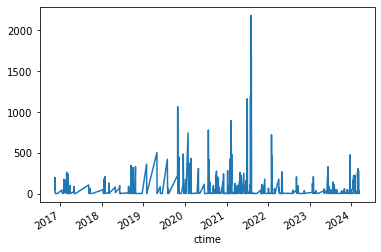

In [10]:
tmp = df_submissions.groupby('ctime').count()
tmp['cid'].plot()